In [60]:
import os
import sys
from tqdm import tqdm
import numpy as np
import re
import random
import math
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import seaborn as sns
from transformers import AutoTokenizer
import matplotlib.patches as mpatches
import scipy.stats as stat
import scipy.stats as stats
from itertools import combinations
from scipy.stats import wilcoxon
from scipy.stats import shapiro, probplot
from tabulate import tabulate

desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "Data_cleaning_cosine_calculation_semantic_and_analysis")
os.chdir(desktop_path)

In [61]:
math_cosine= pd.read_csv("cosine_datasets/math_analysis_cosine.csv")
proofs_cosine= pd.read_csv("cosine_datasets/proofs_analysis_cosine.csv")
read_compr_cosine=pd.read_csv("cosine_datasets/reading_comprehension_analysis_cosine.csv")
crit_reas_cosine=pd.read_csv("cosine_datasets/critical_reasoning_analysis_cosine.csv")
essay_cosine=pd.read_csv("cosine_datasets/essay_evaluation_analysis_cosine.csv")



In [62]:
#Add columns from the math and proofs analysis csv files for analysis

tokenizer = AutoTokenizer.from_pretrained("tbs17/MathBERT-custom")

math_tomerge=pd.read_csv("NLP_analysis/math_analysis.csv")
math_cosine = pd.merge(math_cosine, math_tomerge[['uuid', 'problem', 'deepseek-r1:1.5b_correct', 'deepseek-r1:14b_correct', 'qwen2.5:1.5b_correct', 'qwen2.5:14b_correct', 'deepseek-r1:1.5b_structure_score', 'deepseek-r1:14b_structure_score', 'qwen2.5:1.5b_structure_score', 'qwen2.5:14b_structure_score']], on='uuid', how='left')
math_cosine['problem_token_count'] = math_cosine['problem'].apply(lambda x: len(tokenizer.tokenize(str(x))))
math_cosine = math_cosine.drop(columns=['problem'])

proofs_tomerge=pd.read_csv("NLP_analysis/proofs_analysis.csv")
proofs_cosine = pd.merge(proofs_cosine, proofs_tomerge[['uuid', 'problem', 'deepseek-r1:1.5b_structure_score', 'deepseek-r1:14b_structure_score', 'qwen2.5:1.5b_structure_score', 'qwen2.5:14b_structure_score']], on='uuid', how='left')
proofs_cosine['problem_token_count'] = proofs_cosine['problem'].apply(lambda x: len(tokenizer.tokenize(str(x))))
proofs_cosine = proofs_cosine.drop(columns=['problem'])

In [63]:
#Add columns from the math and proofs analysis csv files for analysis

tokenizer = AutoTokenizer.from_pretrained("sentence-transformers/all-mpnet-base-v2")

essay_tomerge=pd.read_csv("NLP_analysis/essay_evaluation_analysis.csv")
essay_cosine = pd.merge(essay_cosine, essay_tomerge[['QuestionID', 'essay', 'prompt']], on='QuestionID', how='left')
essay_cosine['essay_prompt'] = essay_cosine['essay'] + " " + essay_cosine['prompt']
essay_cosine['problem_token_count'] = essay_cosine['essay_prompt'].apply(lambda x: len(tokenizer.tokenize(str(x))))
essay_cosine = essay_cosine.drop(columns=['essay', 'prompt', 'essay_prompt'])

read_compr_tomerge=pd.read_csv("NLP_analysis/reading_comprehension_analysis.csv")
read_compr_cosine = pd.merge(read_compr_cosine, read_compr_tomerge[['QuestionID', 'PassageText', 'QuestionText', 'deepseek-r1:1.5b_correct', 'deepseek-r1:14b_correct', 'qwen2.5:1.5b_correct', 'qwen2.5:14b_correct', 'deepseek-r1:1.5b_structure_score', 'deepseek-r1:14b_structure_score', 'qwen2.5:1.5b_structure_score', 'qwen2.5:14b_structure_score']], on='QuestionID', how='left')
read_compr_cosine['ProblemText'] = read_compr_cosine['PassageText'] + " " + read_compr_cosine['QuestionText']
read_compr_cosine['problem_token_count'] = read_compr_cosine['ProblemText'].apply(lambda x: len(tokenizer.tokenize(str(x))))
read_compr_cosine = read_compr_cosine.drop(columns=['PassageText', 'QuestionText', 'ProblemText'])

crit_reas_tomerge=pd.read_csv("NLP_analysis/critical_reasoning_analysis.csv")
crit_reas_cosine = pd.merge(crit_reas_cosine, crit_reas_tomerge[['QuestionID', 'QuestionText', 'deepseek-r1:1.5b_correct', 'deepseek-r1:14b_correct', 'qwen2.5:1.5b_correct', 'qwen2.5:14b_correct', 'deepseek-r1:1.5b_structure_score', 'deepseek-r1:14b_structure_score', 'qwen2.5:1.5b_structure_score', 'qwen2.5:14b_structure_score']], on='QuestionID', how='left')
crit_reas_cosine['problem_token_count'] = crit_reas_cosine['QuestionText'].apply(lambda x: len(tokenizer.tokenize(str(x))))
crit_reas_cosine = crit_reas_cosine.drop(columns=['QuestionText'])


Token indices sequence length is longer than the specified maximum sequence length for this model (528 > 512). Running this sequence through the model will result in indexing errors


In [64]:
#Merge critical reasoning and reading comprehension datasets into verbal 
crit_reas_cosine['type'] = 'critical_reasoning'
read_compr_cosine['type'] = 'reading_comprehension'
verbal_cosine = pd.concat([crit_reas_cosine, read_compr_cosine], ignore_index=True)

In [65]:
dfs=['math_cosine', 'proofs_cosine', 'verbal_cosine', 'essay_cosine']

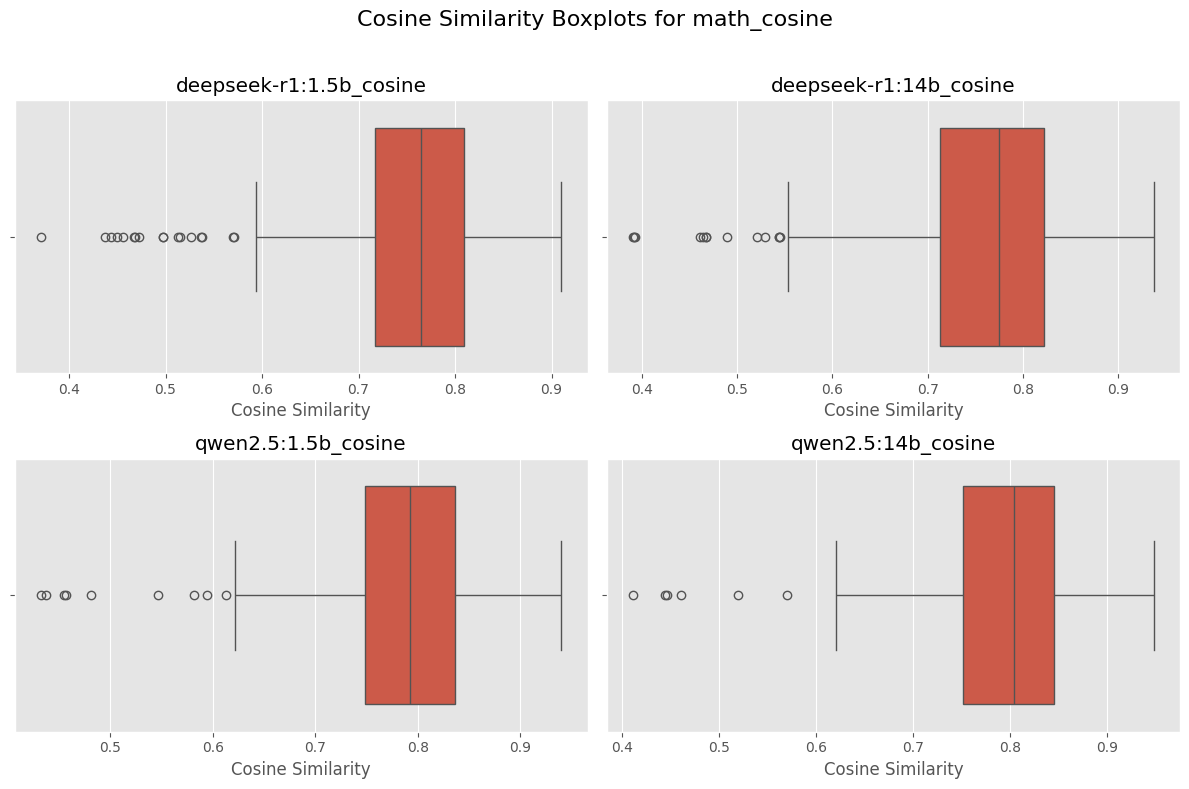

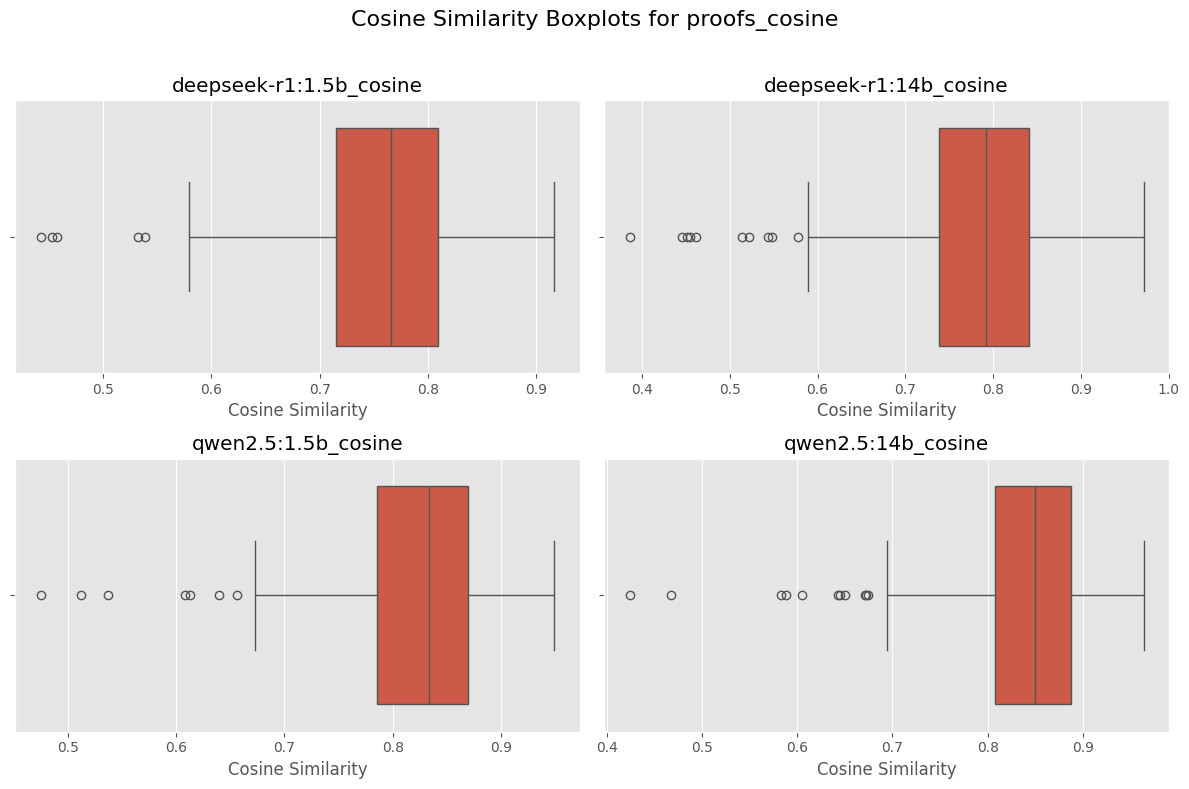

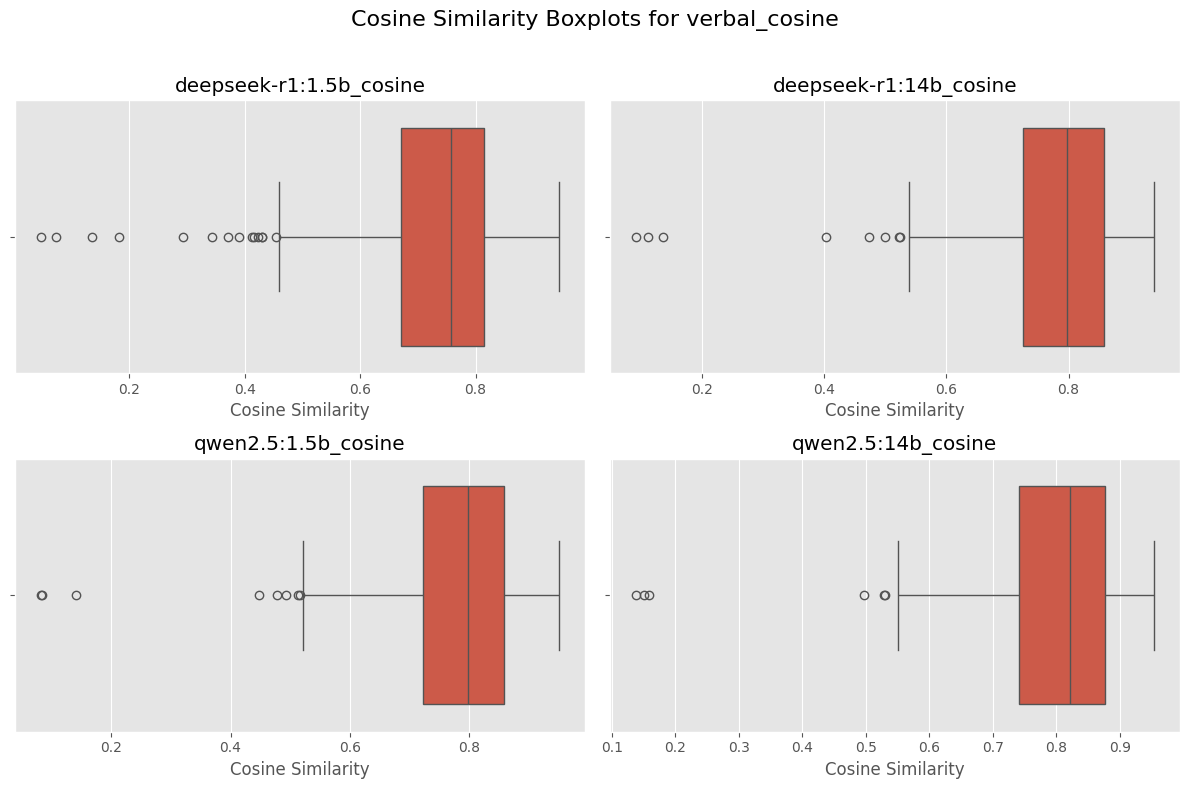

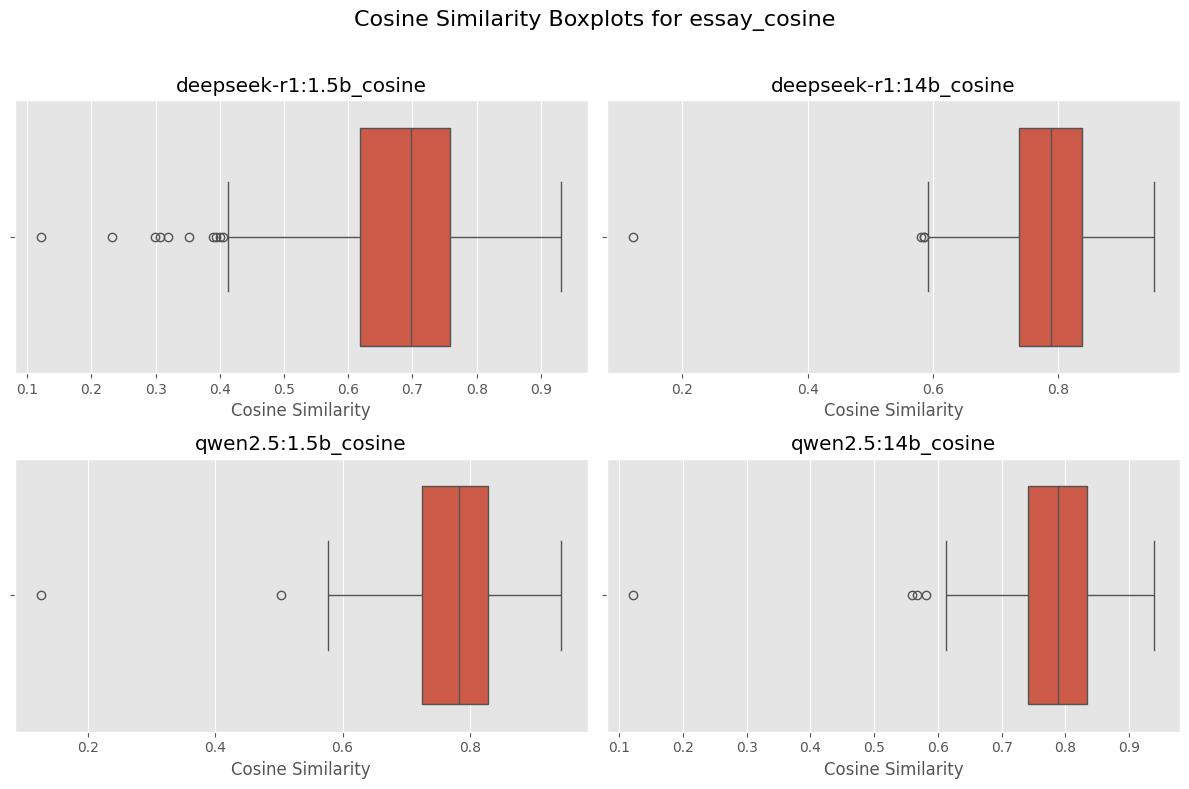

In [66]:
# Plotting preliminary cosine similarity boxplots for each dataset

cosine_cols = [
    'deepseek-r1:1.5b_cosine',
    'deepseek-r1:14b_cosine',
    'qwen2.5:1.5b_cosine',
    'qwen2.5:14b_cosine'
]
for df_name in dfs:
    df = globals()[df_name]
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    fig.suptitle(f"Cosine Similarity Boxplots for {df_name}", fontsize=16)
    
    for ax, col in zip(axes.flatten(), cosine_cols):
        sns.boxplot(x=df[col], ax=ax)
        ax.set_title(col)
        ax.set_xlabel('Cosine Similarity')
        ax.set_ylabel('')
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [67]:
#check for extreme outliers using modified Z-score method common to all models in each dataset and delete them
#common outliers might indicate issues not specific to a single model, but rather to the question or solution itself

def get_extreme_outliers_modified_z(series, threshold=3.5):
    series = series.dropna()
    median = np.median(series)
    mad = np.median(np.abs(series - median))
    if mad == 0:
        return set()
    modified_z = 0.6745 * (series - median) / mad
    return set(series[np.abs(modified_z) > threshold].index)

cosine_cols = [
    'deepseek-r1:1.5b_cosine',
    'deepseek-r1:14b_cosine',
    'qwen2.5:1.5b_cosine',
    'qwen2.5:14b_cosine'
]

dfs = ['math_cosine', 'proofs_cosine', 'verbal_cosine', 'essay_cosine']

cleaned_dfs = {}

for df_name in dfs:
    df = globals()[df_name]
    
    outlier_sets = {col: get_extreme_outliers_modified_z(df[col]) for col in cosine_cols}
    
    common_outliers = set.intersection(*outlier_sets.values())
    
    print(f"{df_name} - indexes that are outliers in ALL models: {sorted(common_outliers)}")

for df_name in dfs:
    df = globals()[df_name]
    outlier_sets = {col: get_extreme_outliers_modified_z(df[col]) for col in cosine_cols}
    common_outliers = set.intersection(*outlier_sets.values())
    cleaned_df = df.drop(index=common_outliers)
    cleaned_dfs[df_name] = cleaned_df

math_cosine_cleaned = cleaned_dfs['math_cosine']
proofs_cosine_cleaned = cleaned_dfs['proofs_cosine']
verbal_cosine_cleaned = cleaned_dfs['verbal_cosine']
essay_cosine_cleaned = cleaned_dfs['essay_cosine']

math_cosine - indexes that are outliers in ALL models: [66, 95, 116, 426]
proofs_cosine - indexes that are outliers in ALL models: [194]
verbal_cosine - indexes that are outliers in ALL models: [246, 247, 248]
essay_cosine - indexes that are outliers in ALL models: [346]


# **Math Questions EDA**

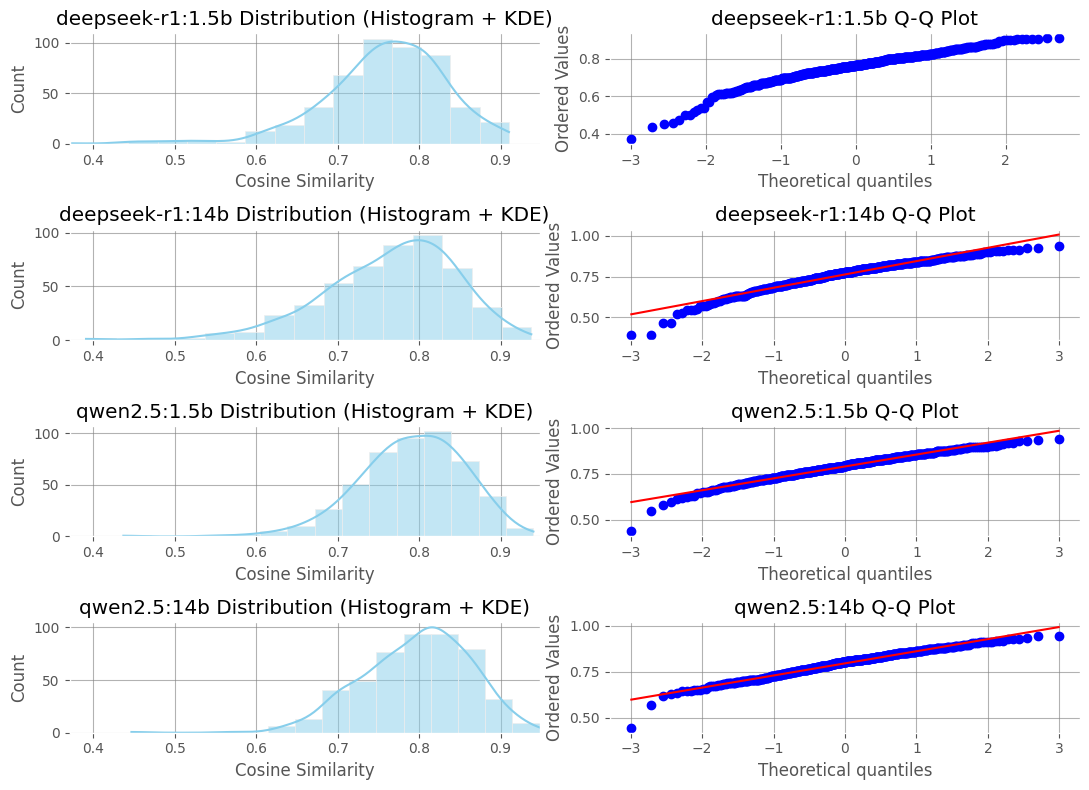

Shapiro-Wilk Normality Test Results:

deepseek-r1:1.5b: W=0.9459, p=0.0000 → Not normal
deepseek-r1:14b: W=0.9594, p=0.0000 → Not normal
qwen2.5:1.5b: W=0.9763, p=0.0000 → Not normal
qwen2.5:14b: W=0.9801, p=0.0000 → Not normal


In [68]:
#check distribution of cosine similarity values for each model in math dataset

df = math_cosine_cleaned.copy()

columns = [
    "deepseek-r1:1.5b_cosine",
    "deepseek-r1:14b_cosine",
    "qwen2.5:1.5b_cosine",
    "qwen2.5:14b_cosine"
]

all_values = pd.concat([df[col].dropna() for col in columns])
xmin, xmax = all_values.min(), all_values.max()

plt.figure(figsize=(11, 8))
for i, col in enumerate(columns):
    plt.subplot(4, 2, i*2 + 1)
    sns.histplot(df[col], kde=True, bins=15, color='skyblue')
    plt.title(f"{col.replace('_cosine', '')} Distribution (Histogram + KDE)")
    plt.xlabel("Cosine Similarity")
    plt.xlim(xmin, xmax)
    plt.gca().set_facecolor('white')
    plt.grid(True, which='both', axis='both', linestyle='-', alpha=0.6, color='gray')

    plt.subplot(4, 2, i*2 + 2)
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f"{col.replace('_cosine', '')} Q-Q Plot")
    plt.gca().set_facecolor('white')
    plt.grid(True, which='both', axis='both', linestyle='-', alpha=0.6, color='gray')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality

print("Shapiro-Wilk Normality Test Results:\n")
for col in columns:
    stat, p = shapiro(df[col].dropna())
    print(f"{col.replace('_cosine', '')}: W={stat:.4f}, p={p:.4f} → {'Not normal' if p < 0.05 else 'Probably normal'}")

In [69]:
#check for statitically significant differences in cosine similarity values among problem types for each model in math dataset

for problem_type in df['problem_type'].unique():
    subset = df[df['problem_type'] == problem_type]
    data = subset[cosine_cols].dropna()
    stat, p = stats.friedmanchisquare(*[data[col] for col in cosine_cols])
    print(f"Problem Type: {problem_type} -- Friedman test statistic={stat:.3f}, p={p:.3g}")

Problem Type: Geometry -- Friedman test statistic=39.641, p=1.27e-08
Problem Type: Number Theory -- Friedman test statistic=28.735, p=2.55e-06
Problem Type: Logic and Puzzles -- Friedman test statistic=38.736, p=1.97e-08
Problem Type: Algebra -- Friedman test statistic=43.577, p=1.86e-09


C:\Users\filip\AppData\Local\Temp\ipykernel_19100\4260627453.py:16: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=melted, x='model_clean', y='cosine_similarity', hue='model', dodge=False, alpha=0.3, color='black', size=2)


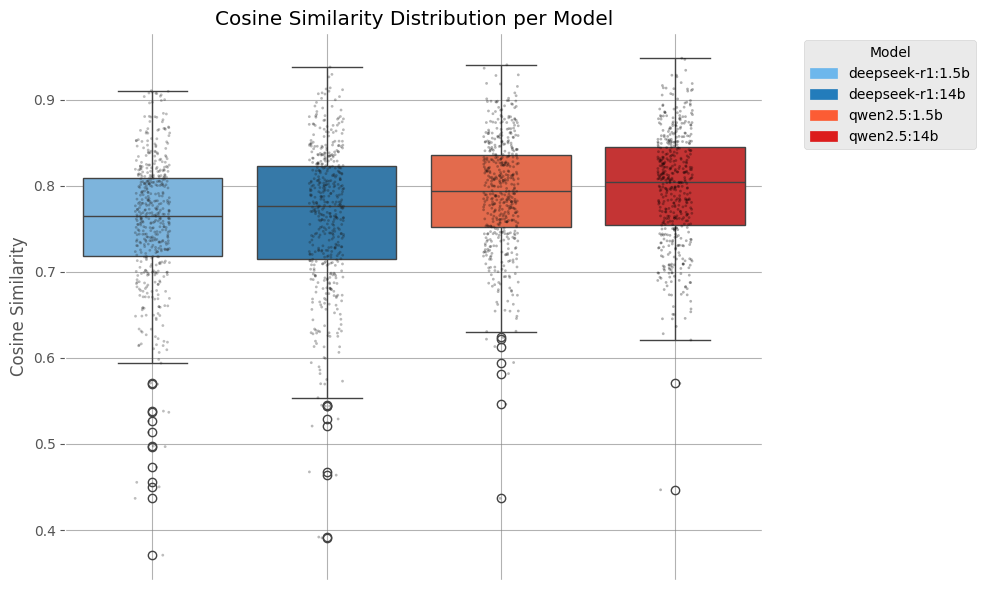

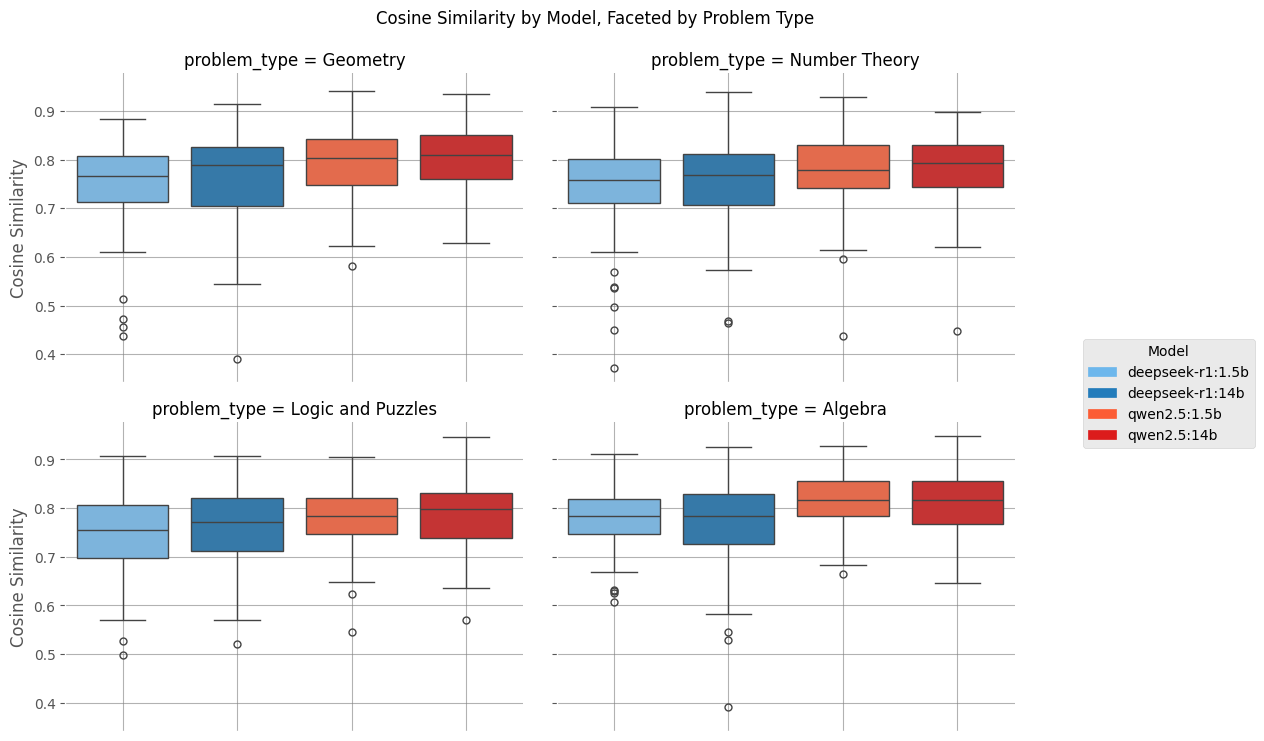

In [70]:
#plot the boxplots of cosine similarity values for each model in math dataset

palette = {
    'deepseek-r1:1.5b_cosine': "#6db7ec",
    'deepseek-r1:14b_cosine': "#237cbb",
    'qwen2.5:1.5b_cosine': "#fc5c34",
    'qwen2.5:14b_cosine': "#dc1c1c" 
}

melted = df.melt(id_vars='problem_type', value_vars=cosine_cols,
                 var_name='model', value_name='cosine_similarity')
melted['model_clean'] = melted['model'].str.replace('_cosine', '', regex=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='model_clean', y='cosine_similarity', hue='model', palette=palette)
sns.stripplot(data=melted, x='model_clean', y='cosine_similarity', hue='model', dodge=False, alpha=0.3, color='black', size=2)
plt.title("Cosine Similarity Distribution per Model")
plt.gca().set_xticklabels([])
plt.gca().set_xlabel('')
plt.gca().tick_params(axis='x', which='both', bottom=False)
plt.ylabel("Cosine Similarity")
plt.gca().set_facecolor('white')
plt.grid(True, which='both', axis='both', linestyle='-', alpha=0.6, color='gray')
plt.legend([], [], frameon=False)
handles = [mpatches.Patch(color=color, label=label.replace('_cosine', '')) for label, color in palette.items()]
plt.legend(handles=handles, title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#plot the boxplots of cosine similarity values for each model, for each problem type, in math dataset

g = sns.catplot(
    data=melted,
    x='model', y='cosine_similarity', col='problem_type',
    kind='box', col_wrap=2, height=4, aspect=1.5, sharey=True,
    hue='model', palette=palette
)

for ax in g.axes.flatten():
    ax.set_xticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel("Cosine Similarity")
    ax.tick_params(axis='x', which='both', bottom=False)
    ax.set_facecolor('white')
    ax.grid(True, which='both', axis='both', linestyle='-', alpha=0.6, color='gray')

if g._legend is not None:
    g._legend.remove()

handles = [mpatches.Patch(color=color, label=label.replace('_cosine', '')) for label, color in palette.items()]
g.fig.legend(handles=handles, title='Model', loc='center right', bbox_to_anchor=(1.05, 0.5), borderaxespad=0.)
g.fig.subplots_adjust(top=0.9, right=0.85) 
g.fig.suptitle('Cosine Similarity by Model, Faceted by Problem Type')
plt.show()

In [71]:
#pairwise Wilcoxon signed-rank test between models for each problem type in math dataset
#this test is used to compare the distributions of cosine similarity values between pairs of models for each problem type, p-value<0.05 indicates a statistically significant difference

results = {}

for problem_type in df['problem_type'].unique():
    subset = df[df['problem_type'] == problem_type].dropna(subset=cosine_cols)
    results[problem_type] = []
    for m1, m2 in combinations(cosine_cols, 2):
        stat, p = wilcoxon(subset[m1], subset[m2])
        results[problem_type].append({'model_1': m1, 'model_2': m2, 'p_value': p})

for problem_type, tests in results.items():
    pvals = [test['p_value'] for test in tests]
    corrected = np.minimum(1, np.array(pvals) * len(pvals)) 
    for i, test in enumerate(tests):
        test['p_adj'] = corrected[i]

for problem_type, tests in results.items():
    print(f"Problem type: {problem_type}")
    for test in tests:
        signif = '***' if test['p_adj'] < 0.001 else ('**' if test['p_adj'] < 0.01 else ('*' if test['p_adj'] < 0.05 else 'ns'))
        print(f"  {test['model_1']} vs {test['model_2']}: p_adj={test['p_adj']:.4f} {signif}")
    print()


Problem type: Geometry
  deepseek-r1:1.5b_cosine vs deepseek-r1:14b_cosine: p_adj=0.1807 ns
  deepseek-r1:1.5b_cosine vs qwen2.5:1.5b_cosine: p_adj=0.0004 ***
  deepseek-r1:1.5b_cosine vs qwen2.5:14b_cosine: p_adj=0.0000 ***
  deepseek-r1:14b_cosine vs qwen2.5:1.5b_cosine: p_adj=0.0082 **
  deepseek-r1:14b_cosine vs qwen2.5:14b_cosine: p_adj=0.0000 ***
  qwen2.5:1.5b_cosine vs qwen2.5:14b_cosine: p_adj=0.0145 *

Problem type: Number Theory
  deepseek-r1:1.5b_cosine vs deepseek-r1:14b_cosine: p_adj=1.0000 ns
  deepseek-r1:1.5b_cosine vs qwen2.5:1.5b_cosine: p_adj=0.0000 ***
  deepseek-r1:1.5b_cosine vs qwen2.5:14b_cosine: p_adj=0.0000 ***
  deepseek-r1:14b_cosine vs qwen2.5:1.5b_cosine: p_adj=0.0461 *
  deepseek-r1:14b_cosine vs qwen2.5:14b_cosine: p_adj=0.0044 **
  qwen2.5:1.5b_cosine vs qwen2.5:14b_cosine: p_adj=1.0000 ns

Problem type: Logic and Puzzles
  deepseek-r1:1.5b_cosine vs deepseek-r1:14b_cosine: p_adj=0.3517 ns
  deepseek-r1:1.5b_cosine vs qwen2.5:1.5b_cosine: p_adj=0.0000 

In [72]:
#check for statitically significant differences in cosine similarity values among problem types for each model in math dataset with Kruskal-Wallis test
# p-value < 0.05 indicates a statistically significant difference in cosine similarity values among problem types for that model

for model_col in cosine_cols:
    groups = [df.loc[df['problem_type'] == pt, model_col].dropna() for pt in df['problem_type'].unique()]
    stat, p = stats.kruskal(*groups)
    print(f"Model: {model_col.replace('_cosine', '')} -- Kruskal-Wallis H={stat:.3f}, p={p:.4g}")


Model: deepseek-r1:1.5b -- Kruskal-Wallis H=18.023, p=0.0004351
Model: deepseek-r1:14b -- Kruskal-Wallis H=4.592, p=0.2043
Model: qwen2.5:1.5b -- Kruskal-Wallis H=25.513, p=1.206e-05
Model: qwen2.5:14b -- Kruskal-Wallis H=14.069, p=0.002813


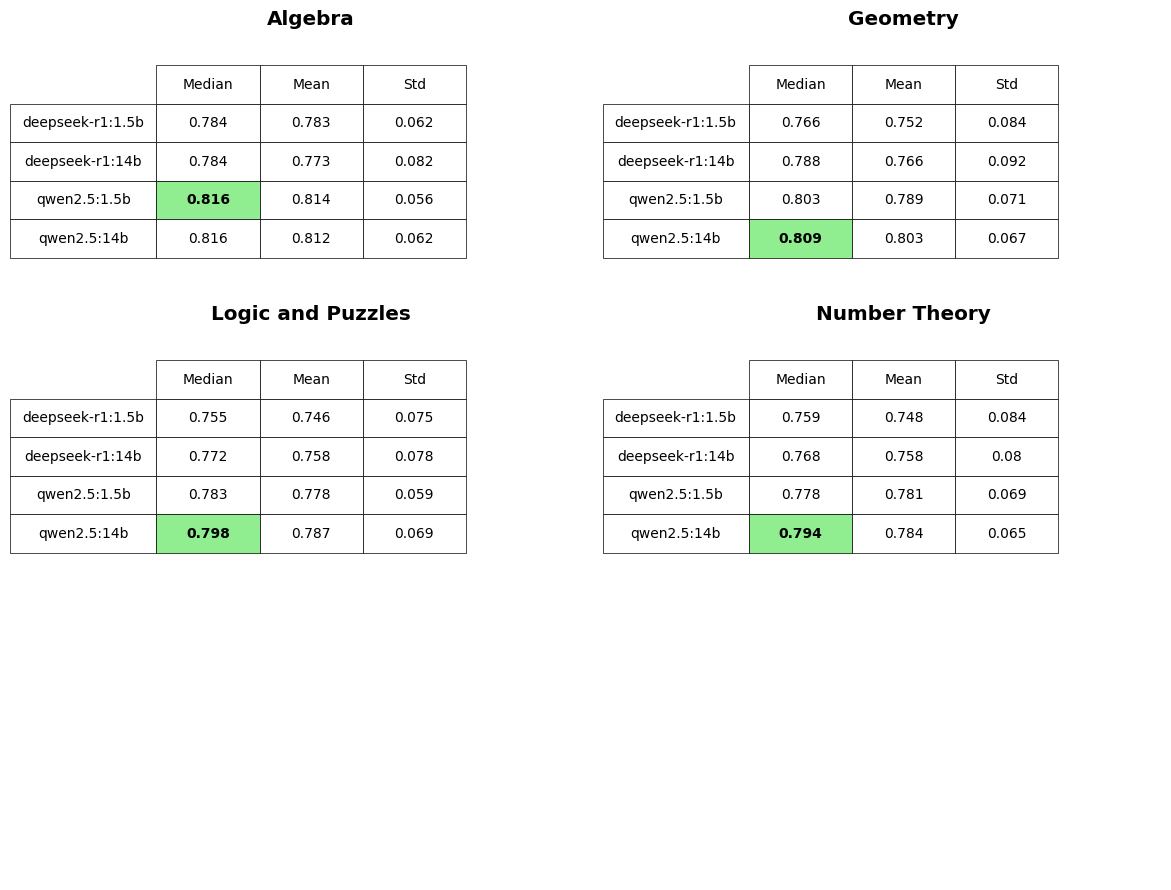

In [73]:
#plot the summary tables of cosine similarity values for each model, for each problem type, in math dataset
#summary tables contain median, mean, and standard deviation of cosine similarity values for each model, for each problem type
#this provides a concise overview of the performance of each model across different problem types, and how they compare to each other

cosine_cols = [
    'deepseek-r1:1.5b_cosine',
    'deepseek-r1:14b_cosine',
    'qwen2.5:1.5b_cosine',
    'qwen2.5:14b_cosine'
]
summary_tables = {}
grouped = math_cosine_cleaned.groupby('problem_type')
for pt, group in grouped:
    stats_df = pd.DataFrame(index=[col.replace('_cosine', '') for col in cosine_cols])
    stats_df['Median'] = group[cosine_cols].median().values
    stats_df['Mean'] = group[cosine_cols].mean().values
    stats_df['Std'] = group[cosine_cols].std().values
    
    stats_df.index.name = 'Model'
    summary_tables[pt] = stats_df.round(3)


problem_types = list(summary_tables.keys())
fig, axes = plt.subplots(3, 2, figsize=(12, 9))
axes = axes.flatten()

for i, pt in enumerate(problem_types):
    ax = axes[i]
    ax.axis('off')
    df = summary_tables[pt].round(3)
    table = ax.table(cellText=df.values,
                     colLabels=df.columns,
                     rowLabels=df.index,
                     cellLoc='center',
                     rowLoc='center',
                     loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(10)

    for key, cell in table.get_celld().items():
        cell.set_width(0.20)
        cell.set_height(0.15)

    best_idx = np.argmax(df['Median'].values)
    median_col_idx = list(df.columns).index('Median') 
    cell = table[best_idx + 1, median_col_idx]
    cell.set_facecolor('lightgreen')
    cell.get_text().set_weight('bold')

    ax.set_title(f'{pt}', fontweight='bold')

for j in range(len(problem_types), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


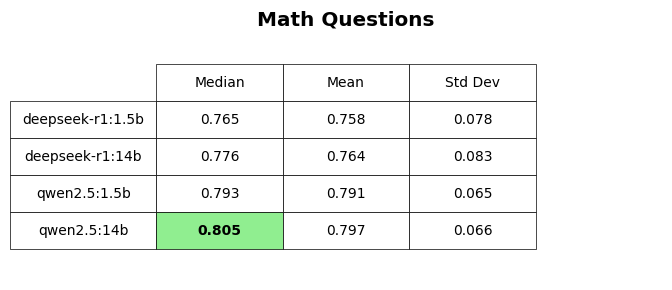

In [74]:
#plot the summary tables of cosine similarity values for each model in math dataset
#summary tables contain median, mean, and standard deviation of cosine similarity values for each model
#this provides a concise overview of the performance of each model and how they compare to each other

overall_summary = (
    math_cosine_cleaned[cosine_cols]
    .agg(['median', 'mean', 'std'])
    .T
    .round(3)
)
overall_summary.columns = ['Median', 'Mean', 'Std Dev']

overall_summary.index = overall_summary.index.str.replace('_cosine$', '', regex=True)

fig, ax = plt.subplots(figsize=(7, 3))
ax.axis('off')

table = ax.table(cellText=overall_summary.values,
                 colLabels=overall_summary.columns,
                 rowLabels=overall_summary.index,
                 cellLoc='center',
                 rowLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)

for key, cell in table.get_celld().items():
    cell.set_width(0.20)
    cell.set_height(0.15)

best_idx = np.argmax(overall_summary['Median'].values)
median_col_idx = list(overall_summary.columns).index('Median')

cell = table[best_idx + 1, median_col_idx]
cell.set_facecolor('lightgreen')
cell.get_text().set_weight('bold')

ax.set_title('Math Questions', fontweight='bold')
plt.tight_layout()
plt.show()


In [75]:
# rank the models based on the times they achieved the highest cosine similariy vis-a-vis the other models, for each question in math dataset

cosine_cols = [
    'deepseek-r1:1.5b_cosine',
    'deepseek-r1:14b_cosine',
    'qwen2.5:1.5b_cosine',
    'qwen2.5:14b_cosine'
]

df = math_cosine_cleaned[cosine_cols]
ranked = df.rank(axis=1, method='min', ascending=False)

ranking_counts = {
    model: ranked[model].value_counts().sort_index()
    for model in cosine_cols
}
ranking_percentages = {
    model: counts / len(df) * 100
    for model, counts in ranking_counts.items()
}

places = ['1st', '2nd', '3rd', '4th']
for place in range(1, 5):
    print(f"\n{place} Place:")
    sorted_models = sorted(
        cosine_cols,
        key=lambda m: ranking_percentages[m].get(place, 0),
        reverse=True
    )
    for model in sorted_models:
        pct = ranking_percentages[model].get(place, 0)
        print(f"  - {model.replace('_cosine', '')}: {pct:.2f}%")

print("\n-- 2. How does each model place on average? --\n")
places = {1: '1st', 2: '2nd', 3: '3rd', 4: '4th'}

for model in cosine_cols:
    print(f"Model: {model.replace('_cosine', '')}")
    for place in range(1, 5):
        pct = ranking_percentages[model].get(place, 0.0)
        print(f"  - {places[place]}: {pct:.2f}%")


1 Place:
  - qwen2.5:14b: 37.10%
  - qwen2.5:1.5b: 30.44%
  - deepseek-r1:14b: 18.95%
  - deepseek-r1:1.5b: 13.51%

2 Place:
  - qwen2.5:1.5b: 31.05%
  - qwen2.5:14b: 30.24%
  - deepseek-r1:14b: 20.77%
  - deepseek-r1:1.5b: 17.94%

3 Place:
  - deepseek-r1:1.5b: 29.84%
  - deepseek-r1:14b: 28.23%
  - qwen2.5:1.5b: 23.39%
  - qwen2.5:14b: 18.55%

4 Place:
  - deepseek-r1:1.5b: 38.51%
  - deepseek-r1:14b: 32.06%
  - qwen2.5:1.5b: 15.12%
  - qwen2.5:14b: 14.11%

-- 2. How does each model place on average? --

Model: deepseek-r1:1.5b
  - 1st: 13.51%
  - 2nd: 17.94%
  - 3rd: 29.84%
  - 4th: 38.51%
Model: deepseek-r1:14b
  - 1st: 18.95%
  - 2nd: 20.77%
  - 3rd: 28.23%
  - 4th: 32.06%
Model: qwen2.5:1.5b
  - 1st: 30.44%
  - 2nd: 31.05%
  - 3rd: 23.39%
  - 4th: 15.12%
Model: qwen2.5:14b
  - 1st: 37.10%
  - 2nd: 30.24%
  - 3rd: 18.55%
  - 4th: 14.11%


# **Proofs Questions EDA**


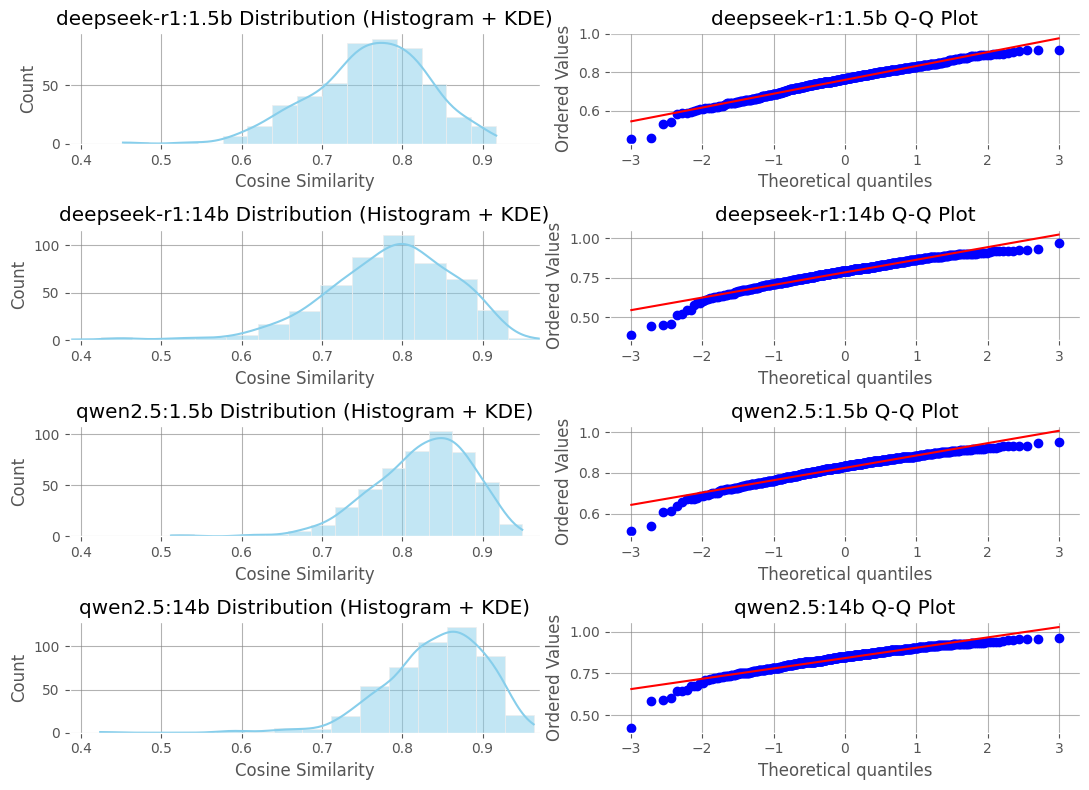

Shapiro-Wilk Normality Test Results:

deepseek-r1:1.5b: W=0.9814, p=0.0000 → Not normal
deepseek-r1:14b: W=0.9543, p=0.0000 → Not normal
qwen2.5:1.5b: W=0.9586, p=0.0000 → Not normal
qwen2.5:14b: W=0.9354, p=0.0000 → Not normal


In [76]:
#check distribution of cosine similarity values for each model in math dataset

df= proofs_cosine_cleaned.copy()

columns = [
    "deepseek-r1:1.5b_cosine",
    "deepseek-r1:14b_cosine",
    "qwen2.5:1.5b_cosine",
    "qwen2.5:14b_cosine"
]

all_values = pd.concat([df[col].dropna() for col in columns])
xmin, xmax = all_values.min(), all_values.max()

plt.figure(figsize=(11, 8))
for i, col in enumerate(columns):
    plt.subplot(4, 2, i*2 + 1)
    sns.histplot(df[col], kde=True, bins=15, color='skyblue')
    plt.title(f"{col.replace('_cosine', '')} Distribution (Histogram + KDE)")
    plt.xlabel("Cosine Similarity")
    plt.xlim(xmin, xmax) 
    plt.gca().set_facecolor('white')
    plt.grid(True, which='both', axis='both', linestyle='-', alpha=0.6, color='gray')

    plt.subplot(4, 2, i*2 + 2)
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f"{col.replace('_cosine', '')} Q-Q Plot")
    plt.gca().set_facecolor('white')
    plt.grid(True, which='both', axis='both', linestyle='-', alpha=0.6, color='gray')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality

print("Shapiro-Wilk Normality Test Results:\n")
for col in columns:
    stat, p = shapiro(df[col].dropna())
    print(f"{col.replace('_cosine', '')}: W={stat:.4f}, p={p:.4f} → {'Not normal' if p < 0.05 else 'Probably normal'}")

In [77]:
#check for statitically significant differences in cosine similarity values among problem types for each model in proofs dataset

for problem_type in df['problem_type'].unique():
    subset = df[df['problem_type'] == problem_type]
    data = subset[cosine_cols].dropna()
    stat, p = stats.friedmanchisquare(*[data[col] for col in cosine_cols])
    print(f"Problem Type: {problem_type} -- Friedman test statistic={stat:.3f}, p={p:.3g}")

Problem Type: Algebra -- Friedman test statistic=109.284, p=1.56e-23
Problem Type: Combinatorics -- Friedman test statistic=74.136, p=5.55e-16
Problem Type: Geometry -- Friedman test statistic=128.340, p=1.23e-27
Problem Type: Number Theory -- Friedman test statistic=66.939, p=1.93e-14
Problem Type: Calculus -- Friedman test statistic=128.844, p=9.6e-28


C:\Users\filip\AppData\Local\Temp\ipykernel_19100\4258337325.py:16: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=melted, x='model_clean', y='cosine_similarity', hue='model', dodge=False, alpha=0.3, color='black', size=2)


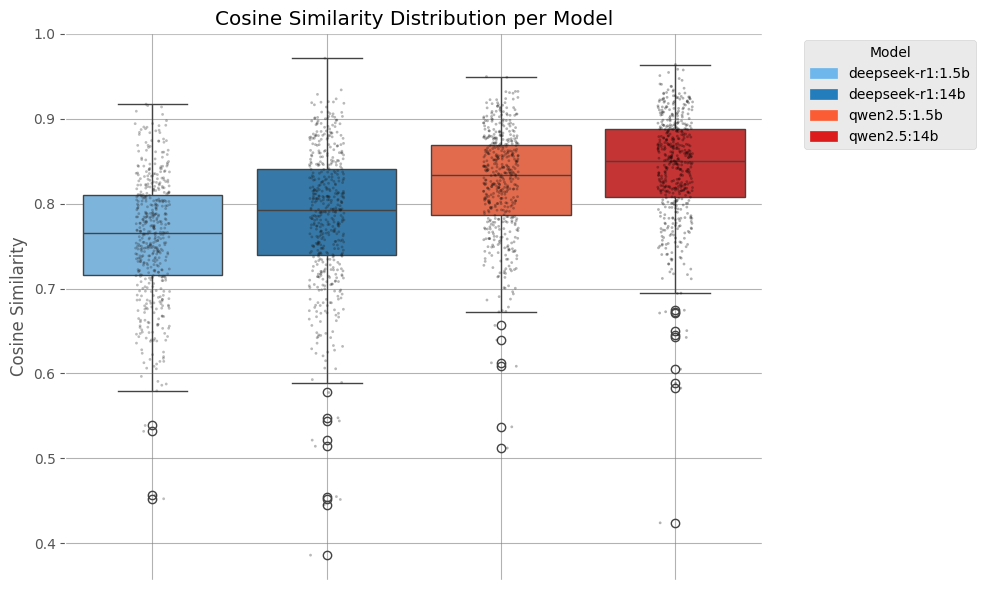

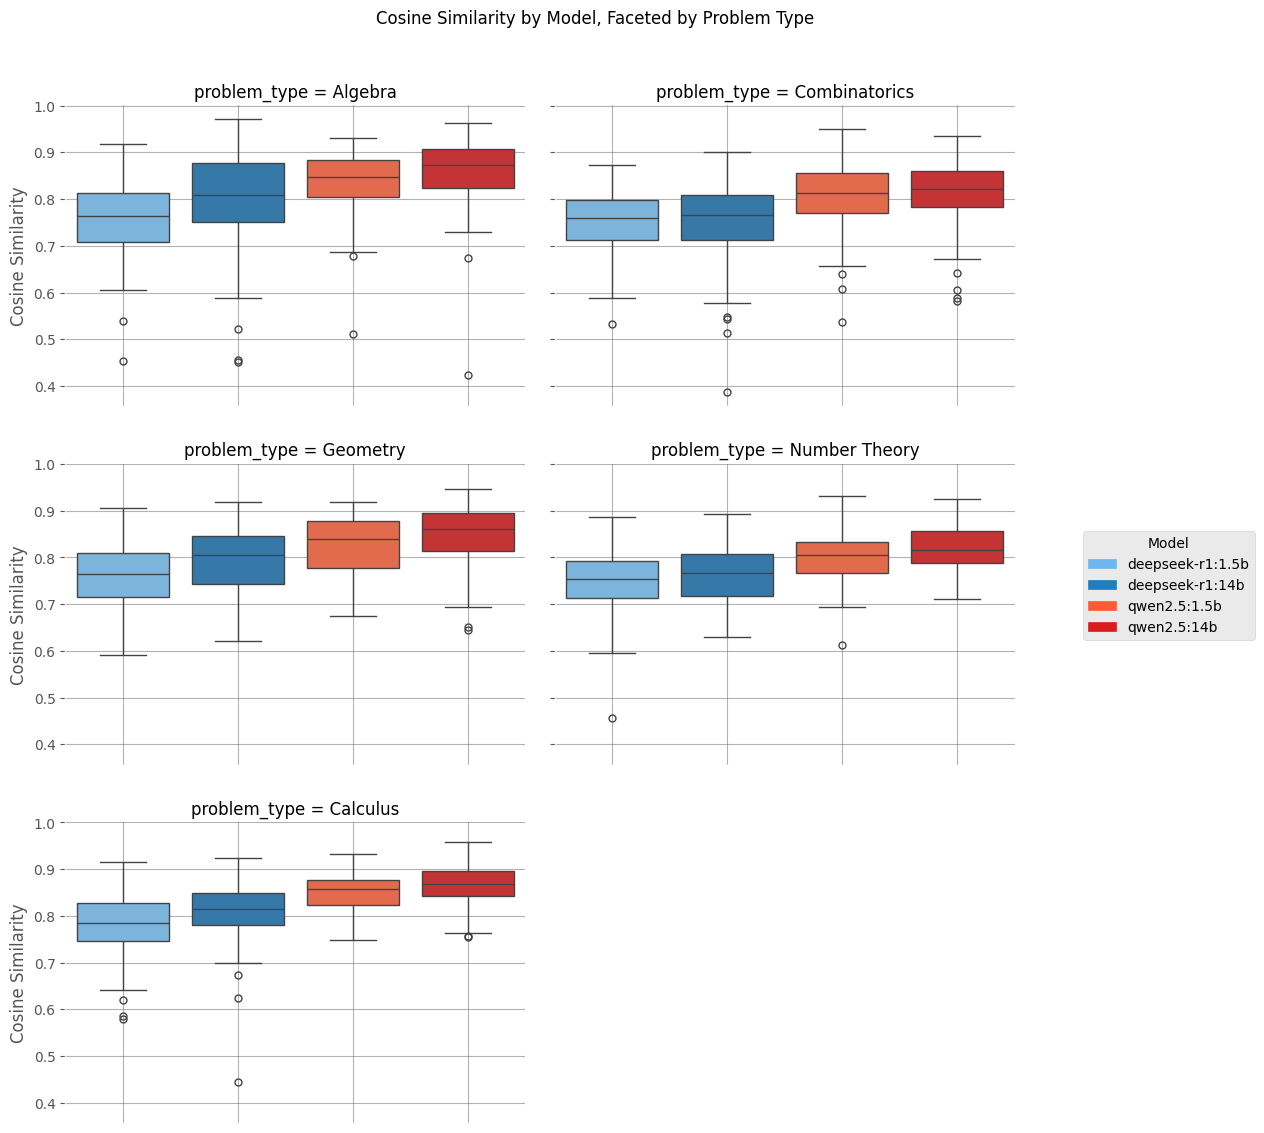

In [78]:
#plot the boxplots of cosine similarity values for each model in proofs datasets

palette = {
    'deepseek-r1:1.5b_cosine': "#6db7ec",
    'deepseek-r1:14b_cosine': "#237cbb",
    'qwen2.5:1.5b_cosine': "#fc5c34",
    'qwen2.5:14b_cosine': "#dc1c1c" 
}

melted = df.melt(id_vars='problem_type', value_vars=cosine_cols,
                 var_name='model', value_name='cosine_similarity')
melted['model_clean'] = melted['model'].str.replace('_cosine', '', regex=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=melted, x='model_clean', y='cosine_similarity', hue='model', palette=palette)
sns.stripplot(data=melted, x='model_clean', y='cosine_similarity', hue='model', dodge=False, alpha=0.3, color='black', size=2)
plt.title("Cosine Similarity Distribution per Model")
plt.gca().set_xticklabels([])
plt.gca().set_xlabel('')
plt.gca().tick_params(axis='x', which='both', bottom=False)
plt.ylabel("Cosine Similarity")
plt.gca().set_facecolor('white')
plt.grid(True, which='both', axis='both', linestyle='-', alpha=0.6, color='gray')
plt.legend([], [], frameon=False)
handles = [mpatches.Patch(color=color, label=label.replace('_cosine', '')) for label, color in palette.items()]
plt.legend(handles=handles, title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#plot the boxplots of cosine similarity values for each model, for each problem type, in proofs dataset

g = sns.catplot(
    data=melted,
    x='model', y='cosine_similarity', col='problem_type',
    kind='box', col_wrap=2, height=4, aspect=1.5, sharey=True,
    hue='model', palette=palette
)

for ax in g.axes.flatten():
    ax.set_xticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel("Cosine Similarity")
    ax.tick_params(axis='x', which='both', bottom=False)
    ax.set_facecolor('white')
    ax.grid(True, which='both', axis='both', linestyle='-', alpha=0.6, color='gray')

if g._legend is not None:
    g._legend.remove()

handles = [mpatches.Patch(color=color, label=label.replace('_cosine', '')) for label, color in palette.items()]
g.fig.legend(handles=handles, title='Model', loc='center right', bbox_to_anchor=(1.05, 0.5), borderaxespad=0.)
g.fig.subplots_adjust(top=0.9, right=0.85) 
g.fig.suptitle('Cosine Similarity by Model, Faceted by Problem Type')
plt.show()

In [79]:
#pairwise Wilcoxon signed-rank between models test for each problem type in proofs dataset
#this test is used to compare the distributions of cosine similarity values between pairs of models for each problem type, p-value<0.05 indicates a statistically significant difference

results = {}

for problem_type in df['problem_type'].unique():
    subset = df[df['problem_type'] == problem_type].dropna(subset=cosine_cols)
    results[problem_type] = []
    for m1, m2 in combinations(cosine_cols, 2):
        stat, p = wilcoxon(subset[m1], subset[m2])
        results[problem_type].append({'model_1': m1, 'model_2': m2, 'p_value': p})

for problem_type, tests in results.items():
    pvals = [test['p_value'] for test in tests]
    corrected = np.minimum(1, np.array(pvals) * len(pvals)) 
    for i, test in enumerate(tests):
        test['p_adj'] = corrected[i]

for problem_type, tests in results.items():
    print(f"Problem type: {problem_type}")
    for test in tests:
        signif = '***' if test['p_adj'] < 0.001 else ('**' if test['p_adj'] < 0.01 else ('*' if test['p_adj'] < 0.05 else 'ns'))
        print(f"  {test['model_1']} vs {test['model_2']}: p_adj={test['p_adj']:.4f} {signif}")
    print()

Problem type: Algebra
  deepseek-r1:1.5b_cosine vs deepseek-r1:14b_cosine: p_adj=0.0003 ***
  deepseek-r1:1.5b_cosine vs qwen2.5:1.5b_cosine: p_adj=0.0000 ***
  deepseek-r1:1.5b_cosine vs qwen2.5:14b_cosine: p_adj=0.0000 ***
  deepseek-r1:14b_cosine vs qwen2.5:1.5b_cosine: p_adj=0.0001 ***
  deepseek-r1:14b_cosine vs qwen2.5:14b_cosine: p_adj=0.0000 ***
  qwen2.5:1.5b_cosine vs qwen2.5:14b_cosine: p_adj=0.0005 ***

Problem type: Combinatorics
  deepseek-r1:1.5b_cosine vs deepseek-r1:14b_cosine: p_adj=1.0000 ns
  deepseek-r1:1.5b_cosine vs qwen2.5:1.5b_cosine: p_adj=0.0000 ***
  deepseek-r1:1.5b_cosine vs qwen2.5:14b_cosine: p_adj=0.0000 ***
  deepseek-r1:14b_cosine vs qwen2.5:1.5b_cosine: p_adj=0.0000 ***
  deepseek-r1:14b_cosine vs qwen2.5:14b_cosine: p_adj=0.0000 ***
  qwen2.5:1.5b_cosine vs qwen2.5:14b_cosine: p_adj=0.8468 ns

Problem type: Geometry
  deepseek-r1:1.5b_cosine vs deepseek-r1:14b_cosine: p_adj=0.0006 ***
  deepseek-r1:1.5b_cosine vs qwen2.5:1.5b_cosine: p_adj=0.0000 **

In [80]:
#check for statitically significant differences in cosine similarity values among problem types for each model in proofs  dataset with Kruskal-Wallis test
# p-value < 0.05 indicates a statistically significant difference in cosine similarity values among problem types for that model

for model_col in cosine_cols:
    groups = [df.loc[df['problem_type'] == pt, model_col].dropna() for pt in df['problem_type'].unique()]
    stat, p = stats.kruskal(*groups)
    print(f"Model: {model_col.replace('_cosine', '')} -- Kruskal-Wallis H={stat:.3f}, p={p:.4g}")

Model: deepseek-r1:1.5b -- Kruskal-Wallis H=14.189, p=0.006715
Model: deepseek-r1:14b -- Kruskal-Wallis H=42.708, p=1.19e-08
Model: qwen2.5:1.5b -- Kruskal-Wallis H=57.355, p=1.042e-11
Model: qwen2.5:14b -- Kruskal-Wallis H=63.695, p=4.845e-13


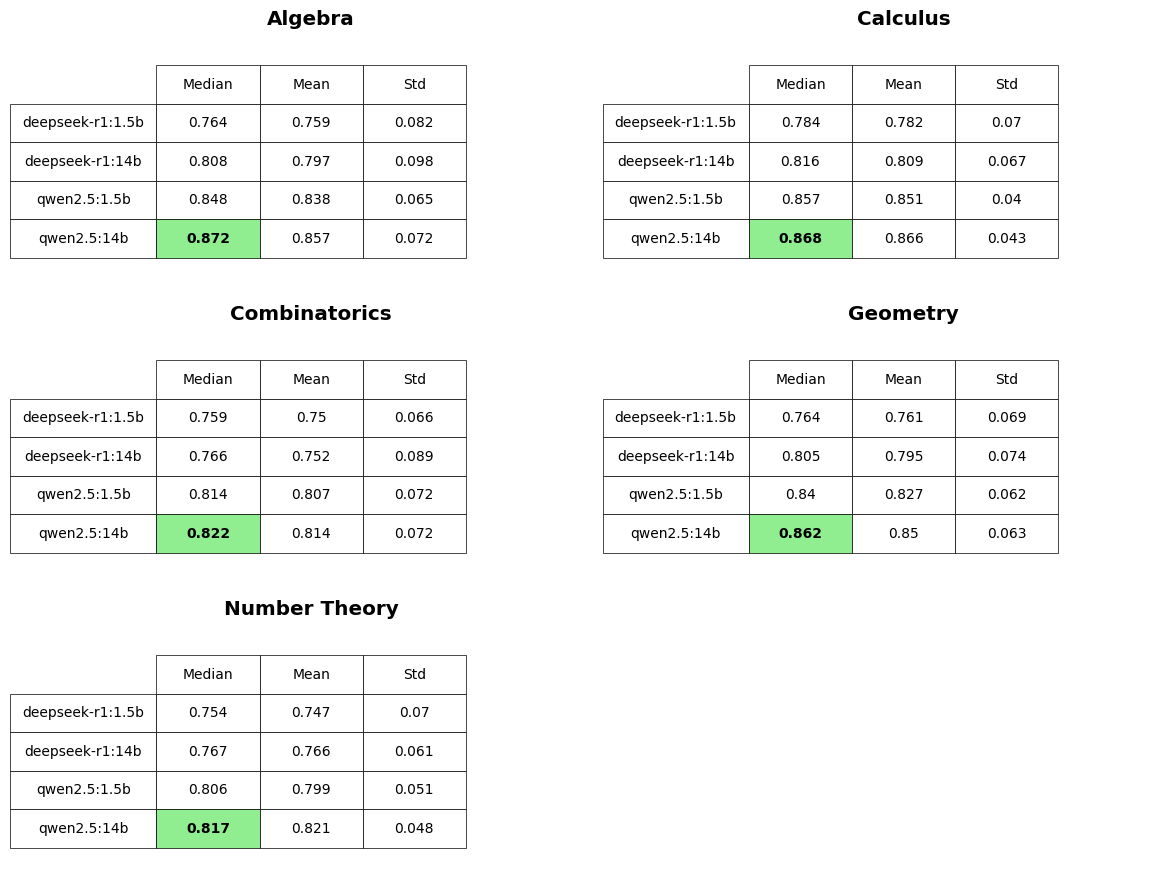

In [81]:
#plot the summary tables of cosine similarity values for each model, for each problem type, in proofs dataset
#summary tables contain median, mean, and standard deviation of cosine similarity values for each model, for each problem type
#this provides a concise overview of the performance of each model across different problem types, and how they compare to each other

cosine_cols = [
    'deepseek-r1:1.5b_cosine',
    'deepseek-r1:14b_cosine',
    'qwen2.5:1.5b_cosine',
    'qwen2.5:14b_cosine'
]
summary_tables = {}
grouped = proofs_cosine_cleaned.groupby('problem_type')
for pt, group in grouped:
    stats_df = pd.DataFrame(index=[col.replace('_cosine', '') for col in cosine_cols])
    stats_df['Median'] = group[cosine_cols].median().values
    stats_df['Mean'] = group[cosine_cols].mean().values
    stats_df['Std'] = group[cosine_cols].std().values
    
    stats_df.index.name = 'Model'
    summary_tables[pt] = stats_df.round(3)


problem_types = list(summary_tables.keys())
fig, axes = plt.subplots(3, 2, figsize=(12, 9))
axes = axes.flatten()

for i, pt in enumerate(problem_types):
    ax = axes[i]
    ax.axis('off')
    df = summary_tables[pt].round(3)
    table = ax.table(cellText=df.values,
                     colLabels=df.columns,
                     rowLabels=df.index,
                     cellLoc='center',
                     rowLoc='center',
                     loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(10)

    for key, cell in table.get_celld().items():
        cell.set_width(0.20)
        cell.set_height(0.15)

    best_idx = np.argmax(df['Median'].values)
    median_col_idx = list(df.columns).index('Median') 
    cell = table[best_idx + 1, median_col_idx]
    cell.set_facecolor('lightgreen')
    cell.get_text().set_weight('bold')

    ax.set_title(f'{pt}', fontweight='bold')

for j in range(len(problem_types), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

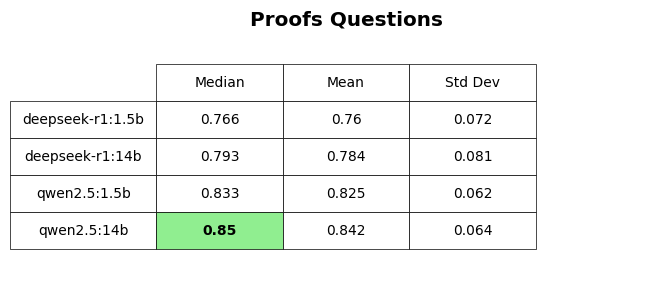

In [82]:
#plot the summary tables of cosine similarity values for each model in verbal dataset
#summary tables contain median, mean, and standard deviation of cosine similarity values for each model
#this provides a concise overview of the performance of each model and how they compare to each other

overall_summary = (
    proofs_cosine_cleaned[cosine_cols]
    .agg(['median', 'mean', 'std'])
    .T
    .round(3)
)
overall_summary.columns = ['Median', 'Mean', 'Std Dev']

overall_summary.index = overall_summary.index.str.replace('_cosine$', '', regex=True)

fig, ax = plt.subplots(figsize=(7, 3))
ax.axis('off')

table = ax.table(cellText=overall_summary.values,
                 colLabels=overall_summary.columns,
                 rowLabels=overall_summary.index,
                 cellLoc='center',
                 rowLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)

for key, cell in table.get_celld().items():
    cell.set_width(0.20)
    cell.set_height(0.15)

best_idx = np.argmax(overall_summary['Median'].values)
median_col_idx = list(overall_summary.columns).index('Median')

cell = table[best_idx + 1, median_col_idx]
cell.set_facecolor('lightgreen')
cell.get_text().set_weight('bold')

ax.set_title('Proofs Questions', fontweight='bold')

plt.tight_layout()
plt.show()


In [83]:
# rank the models based on the times they achieved the highest cosine similariy vis-a-vis the other models, for each question in proofs dataset

cosine_cols = [
    'deepseek-r1:1.5b_cosine',
    'deepseek-r1:14b_cosine',
    'qwen2.5:1.5b_cosine',
    'qwen2.5:14b_cosine'
]

df = proofs_cosine_cleaned[cosine_cols]
ranked = df.rank(axis=1, method='min', ascending=False)

ranking_counts = {
    model: ranked[model].value_counts().sort_index()
    for model in cosine_cols
}
ranking_percentages = {
    model: counts / len(df) * 100
    for model, counts in ranking_counts.items()
}

places = ['1st', '2nd', '3rd', '4th']
for place in range(1, 5):
    print(f"\n{place} Place:")
    sorted_models = sorted(
        cosine_cols,
        key=lambda m: ranking_percentages[m].get(place, 0),
        reverse=True
    )
    for model in sorted_models:
        pct = ranking_percentages[model].get(place, 0)
        print(f"  - {model.replace('_cosine', '')}: {pct:.2f}%")

print("\n-- 2. How does each model place on average? --\n")
places = {1: '1st', 2: '2nd', 3: '3rd', 4: '4th'}

for model in cosine_cols:
    print(f"Model: {model.replace('_cosine', '')}")
    for place in range(1, 5):
        pct = ranking_percentages[model].get(place, 0.0)
        print(f"  - {places[place]}: {pct:.2f}%")


1 Place:
  - qwen2.5:14b: 54.71%
  - qwen2.5:1.5b: 26.45%
  - deepseek-r1:14b: 12.83%
  - deepseek-r1:1.5b: 6.01%

2 Place:
  - qwen2.5:1.5b: 42.89%
  - qwen2.5:14b: 28.46%
  - deepseek-r1:14b: 17.03%
  - deepseek-r1:1.5b: 11.62%

3 Place:
  - deepseek-r1:14b: 35.67%
  - deepseek-r1:1.5b: 29.86%
  - qwen2.5:1.5b: 22.44%
  - qwen2.5:14b: 12.02%

4 Place:
  - deepseek-r1:1.5b: 52.51%
  - deepseek-r1:14b: 34.47%
  - qwen2.5:1.5b: 8.22%
  - qwen2.5:14b: 4.81%

-- 2. How does each model place on average? --

Model: deepseek-r1:1.5b
  - 1st: 6.01%
  - 2nd: 11.62%
  - 3rd: 29.86%
  - 4th: 52.51%
Model: deepseek-r1:14b
  - 1st: 12.83%
  - 2nd: 17.03%
  - 3rd: 35.67%
  - 4th: 34.47%
Model: qwen2.5:1.5b
  - 1st: 26.45%
  - 2nd: 42.89%
  - 3rd: 22.44%
  - 4th: 8.22%
Model: qwen2.5:14b
  - 1st: 54.71%
  - 2nd: 28.46%
  - 3rd: 12.02%
  - 4th: 4.81%


# **Verbal Questions EDA**

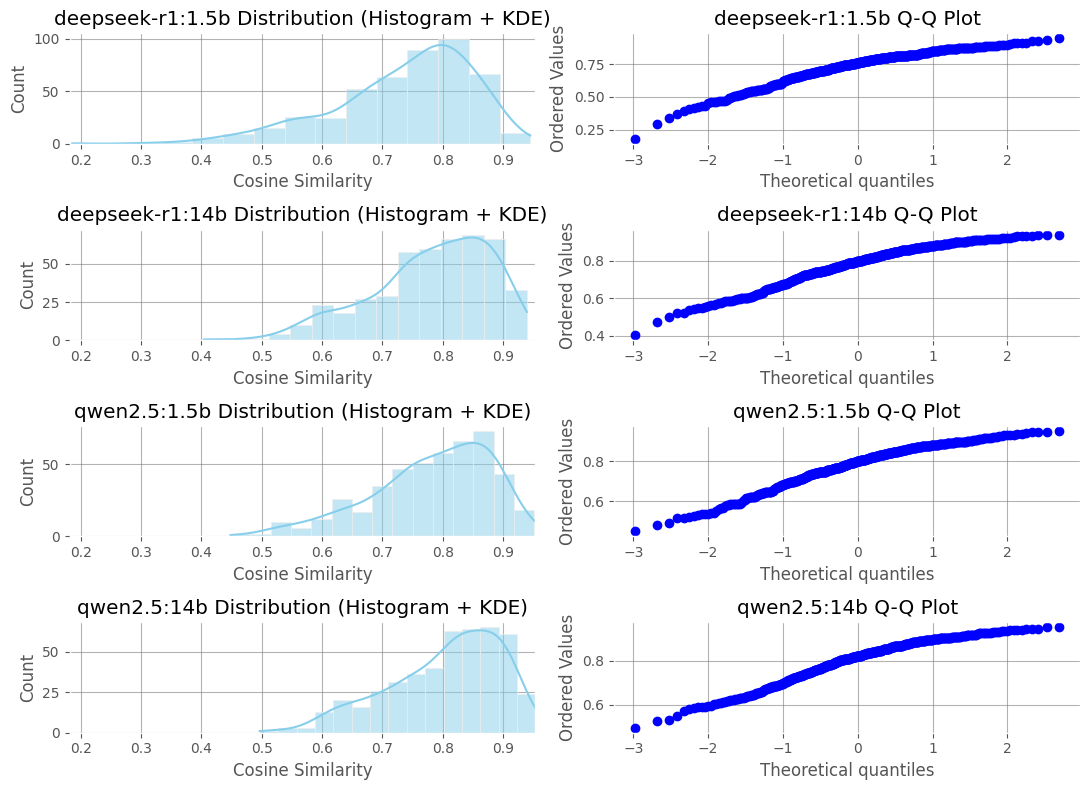

Shapiro-Wilk Normality Test Results:

deepseek-r1:1.5b: W=0.9331, p=0.0000 → Not normal
deepseek-r1:14b: W=0.9529, p=0.0000 → Not normal
qwen2.5:1.5b: W=0.9524, p=0.0000 → Not normal
qwen2.5:14b: W=0.9489, p=0.0000 → Not normal


In [84]:
#check distribution of cosine similarity values for each model in verbal dataset

verbal_cosune_cleaned=verbal_cosine_cleaned.rename(columns={'type': 'problem_type'}, inplace=True)

df= verbal_cosine_cleaned.copy()

columns = [
    "deepseek-r1:1.5b_cosine",
    "deepseek-r1:14b_cosine",
    "qwen2.5:1.5b_cosine",
    "qwen2.5:14b_cosine"
]

all_values = pd.concat([df[col].dropna() for col in columns])
xmin, xmax = all_values.min(), all_values.max()

plt.figure(figsize=(11, 8))
for i, col in enumerate(columns):
    plt.subplot(4, 2, i*2 + 1)
    sns.histplot(df[col], kde=True, bins=15, color='skyblue')
    plt.title(f"{col.replace('_cosine', '')} Distribution (Histogram + KDE)")
    plt.xlabel("Cosine Similarity")
    plt.xlim(xmin, xmax)
    plt.gca().set_facecolor('white')
    plt.grid(True, which='both', axis='both', linestyle='-', alpha=0.6, color='gray')

    plt.subplot(4, 2, i*2 + 2)
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f"{col.replace('_cosine', '')} Q-Q Plot")
    plt.gca().set_facecolor('white')
    plt.grid(True, which='both', axis='both', linestyle='-', alpha=0.6, color='gray')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality

print("Shapiro-Wilk Normality Test Results:\n")
for col in columns:
    stat, p = shapiro(df[col].dropna())
    print(f"{col.replace('_cosine', '')}: W={stat:.4f}, p={p:.4f} → {'Not normal' if p < 0.05 else 'Probably normal'}")

In [85]:
#check for statitically significant differences in cosine similarity values among problem types for each model in verbal dataset

for problem_type in df['problem_type'].unique():
    subset = df[df['problem_type'] == problem_type]
    data = subset[cosine_cols].dropna()
    stat, p = stats.friedmanchisquare(*[data[col] for col in cosine_cols])
    print(f"Problem Type: {problem_type} -- Friedman test statistic={stat:.3f}, p={p:.3g}")

Problem Type: critical_reasoning -- Friedman test statistic=163.562, p=3.12e-35
Problem Type: reading_comprehension -- Friedman test statistic=87.643, p=7.02e-19


C:\Users\filip\AppData\Local\Temp\ipykernel_19100\3635762127.py:16: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=melted, x='model_clean', y='cosine_similarity', hue='model', dodge=False, alpha=0.3, color='black', size=2)


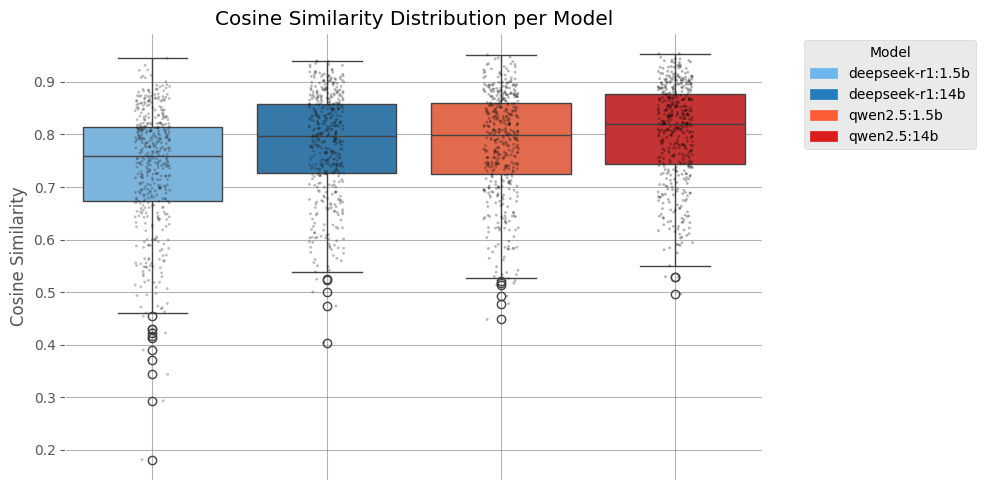

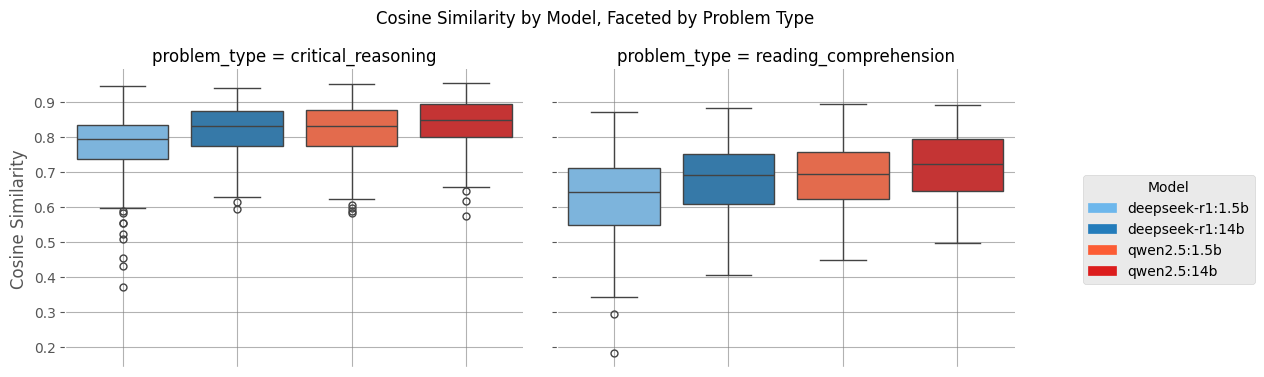

In [86]:
#plot the boxplots of cosine similarity values for each model in verbal dataset

palette = {
    'deepseek-r1:1.5b_cosine': "#6db7ec",
    'deepseek-r1:14b_cosine': "#237cbb",
    'qwen2.5:1.5b_cosine': "#fc5c34",
    'qwen2.5:14b_cosine': "#dc1c1c" 
}

melted = df.melt(id_vars='problem_type', value_vars=cosine_cols,
                 var_name='model', value_name='cosine_similarity')
melted['model_clean'] = melted['model'].str.replace('_cosine', '', regex=True)

plt.figure(figsize=(10, 5))
sns.boxplot(data=melted, x='model_clean', y='cosine_similarity', hue='model', palette=palette)
sns.stripplot(data=melted, x='model_clean', y='cosine_similarity', hue='model', dodge=False, alpha=0.3, color='black', size=2)
plt.title("Cosine Similarity Distribution per Model")
plt.gca().set_xticklabels([])
plt.gca().set_xlabel('')
plt.gca().tick_params(axis='x', which='both', bottom=False)
plt.ylabel("Cosine Similarity")
plt.gca().set_facecolor('white')
plt.grid(True, which='both', axis='both', linestyle='-', alpha=0.6, color='gray')
plt.legend([], [], frameon=False)
handles = [mpatches.Patch(color=color, label=label.replace('_cosine', '')) for label, color in palette.items()]
plt.legend(handles=handles, title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#plot the boxplots of cosine similarity values for each model, for each problem type, in verbal dataset

g = sns.catplot(
    data=melted,
    x='model', y='cosine_similarity', col='problem_type',
    kind='box', col_wrap=2, height=4, aspect=1.5, sharey=True,
    hue='model', palette=palette
)

for ax in g.axes.flatten():
    ax.set_xticklabels([])
    ax.set_xlabel('')
    ax.set_ylabel("Cosine Similarity")
    ax.tick_params(axis='x', which='both', bottom=False)
    ax.set_facecolor('white')
    ax.grid(True, which='both', axis='both', linestyle='-', alpha=0.6, color='gray')

if g._legend is not None:
    g._legend.remove()

handles = [mpatches.Patch(color=color, label=label.replace('_cosine', '')) for label, color in palette.items()]
g.fig.legend(handles=handles, title='Model', loc='center right', bbox_to_anchor=(1.05, 0.5), borderaxespad=0.)
g.fig.subplots_adjust(top=0.9, right=0.85) 
g.fig.suptitle('Cosine Similarity by Model, Faceted by Problem Type', y=1.05)

plt.show()

In [87]:
#pairwise Wilcoxon signed-rank test between models for each problem type in verbal dataset
#this test is used to compare the distributions of cosine similarity values between pairs of models for each problem type, p-value<0.05 indicates a statistically significant difference

results = {}

for problem_type in df['problem_type'].unique():
    subset = df[df['problem_type'] == problem_type].dropna(subset=cosine_cols)
    results[problem_type] = []
    for m1, m2 in combinations(cosine_cols, 2):
        stat, p = wilcoxon(subset[m1], subset[m2])
        results[problem_type].append({'model_1': m1, 'model_2': m2, 'p_value': p})

for problem_type, tests in results.items():
    pvals = [test['p_value'] for test in tests]
    corrected = np.minimum(1, np.array(pvals) * len(pvals)) 
    for i, test in enumerate(tests):
        test['p_adj'] = corrected[i]

for problem_type, tests in results.items():
    print(f"Problem type: {problem_type}")
    for test in tests:
        signif = '***' if test['p_adj'] < 0.001 else ('**' if test['p_adj'] < 0.01 else ('*' if test['p_adj'] < 0.05 else 'ns'))
        print(f"  {test['model_1']} vs {test['model_2']}: p_adj={test['p_adj']:.4f} {signif}")
    print()

Problem type: critical_reasoning
  deepseek-r1:1.5b_cosine vs deepseek-r1:14b_cosine: p_adj=0.0000 ***
  deepseek-r1:1.5b_cosine vs qwen2.5:1.5b_cosine: p_adj=0.0000 ***
  deepseek-r1:1.5b_cosine vs qwen2.5:14b_cosine: p_adj=0.0000 ***
  deepseek-r1:14b_cosine vs qwen2.5:1.5b_cosine: p_adj=1.0000 ns
  deepseek-r1:14b_cosine vs qwen2.5:14b_cosine: p_adj=0.0000 ***
  qwen2.5:1.5b_cosine vs qwen2.5:14b_cosine: p_adj=0.0000 ***

Problem type: reading_comprehension
  deepseek-r1:1.5b_cosine vs deepseek-r1:14b_cosine: p_adj=0.0000 ***
  deepseek-r1:1.5b_cosine vs qwen2.5:1.5b_cosine: p_adj=0.0000 ***
  deepseek-r1:1.5b_cosine vs qwen2.5:14b_cosine: p_adj=0.0000 ***
  deepseek-r1:14b_cosine vs qwen2.5:1.5b_cosine: p_adj=1.0000 ns
  deepseek-r1:14b_cosine vs qwen2.5:14b_cosine: p_adj=0.0000 ***
  qwen2.5:1.5b_cosine vs qwen2.5:14b_cosine: p_adj=0.0001 ***



In [88]:
#check for statitically significant differences in cosine similarity values among problem types for each model in verbal dataset with Kruskal-Wallis test
# p-value < 0.05 indicates a statistically significant difference in cosine similarity values among problem types for that model

for model_col in cosine_cols:
    groups = [df.loc[df['problem_type'] == pt, model_col].dropna() for pt in df['problem_type'].unique()]
    stat, p = stats.kruskal(*groups)
    print(f"Model: {model_col.replace('_cosine', '')} -- Kruskal-Wallis H={stat:.3f}, p={p:.4g}")

Model: deepseek-r1:1.5b -- Kruskal-Wallis H=159.235, p=1.663e-36
Model: deepseek-r1:14b -- Kruskal-Wallis H=153.338, p=3.231e-35
Model: qwen2.5:1.5b -- Kruskal-Wallis H=152.854, p=4.124e-35
Model: qwen2.5:14b -- Kruskal-Wallis H=142.131, p=9.104e-33


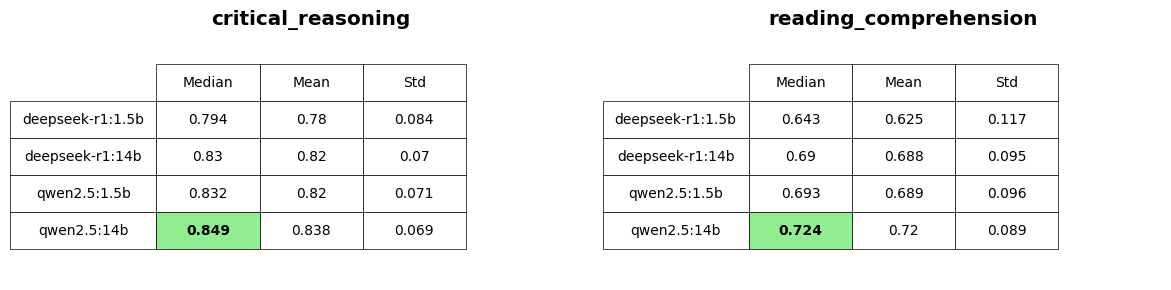

In [89]:
#plot the summary tables of cosine similarity values for each model, for each verbal type, in math dataset
#summary tables contain median, mean, and standard deviation of cosine similarity values for each model, for each problem type
#this provides a concise overview of the performance of each model across different problem types, and how they compare to each other

cosine_cols = [
    'deepseek-r1:1.5b_cosine',
    'deepseek-r1:14b_cosine',
    'qwen2.5:1.5b_cosine',
    'qwen2.5:14b_cosine'
]
summary_tables = {}
grouped = verbal_cosine_cleaned.groupby('problem_type')
for pt, group in grouped:
    stats_df = pd.DataFrame(index=[col.replace('_cosine', '') for col in cosine_cols])
    stats_df['Median'] = group[cosine_cols].median().values
    stats_df['Mean'] = group[cosine_cols].mean().values
    stats_df['Std'] = group[cosine_cols].std().values
    
    stats_df.index.name = 'Model'
    summary_tables[pt] = stats_df.round(3)


problem_types = list(summary_tables.keys())
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes = axes.flatten()

for i, pt in enumerate(problem_types):
    ax = axes[i]
    ax.axis('off')
    df = summary_tables[pt].round(3)
    table = ax.table(cellText=df.values,
                     colLabels=df.columns,
                     rowLabels=df.index,
                     cellLoc='center',
                     rowLoc='center',
                     loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(10)

    for key, cell in table.get_celld().items():
        cell.set_width(0.20)
        cell.set_height(0.15)

    best_idx = np.argmax(df['Median'].values)
    median_col_idx = list(df.columns).index('Median') 
    cell = table[best_idx + 1, median_col_idx]
    cell.set_facecolor('lightgreen')
    cell.get_text().set_weight('bold')

    ax.set_title(f'{pt}', fontweight='bold')

for j in range(len(problem_types), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

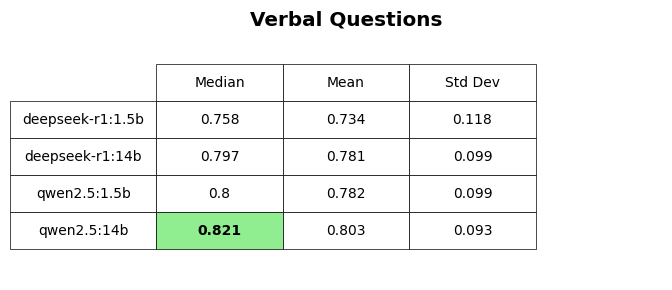

In [90]:
#plot the summary tables of cosine similarity values for each model in verbal dataset
#summary tables contain median, mean, and standard deviation of cosine similarity values for each model
#this provides a concise overview of the performance of each model and how they compare to each other

overall_summary = (
    verbal_cosine_cleaned[cosine_cols]
    .agg(['median', 'mean', 'std'])
    .T
    .round(3)
)
overall_summary.columns = ['Median', 'Mean', 'Std Dev']

overall_summary.index = overall_summary.index.str.replace('_cosine$', '', regex=True)

fig, ax = plt.subplots(figsize=(7, 3))
ax.axis('off')

table = ax.table(cellText=overall_summary.values,
                 colLabels=overall_summary.columns,
                 rowLabels=overall_summary.index,
                 cellLoc='center',
                 rowLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)

for key, cell in table.get_celld().items():
    cell.set_width(0.20)
    cell.set_height(0.15)

best_idx = np.argmax(overall_summary['Median'].values)
median_col_idx = list(overall_summary.columns).index('Median')

cell = table[best_idx + 1, median_col_idx]
cell.set_facecolor('lightgreen')
cell.get_text().set_weight('bold')

ax.set_title('Verbal Questions', fontweight='bold')

plt.tight_layout()
plt.show()

In [91]:
# rank the models based on the times they achieved the highest cosine similariy vis-a-vis the other models, for each question in verbal dataset

cosine_cols = [
    'deepseek-r1:1.5b_cosine',
    'deepseek-r1:14b_cosine',
    'qwen2.5:1.5b_cosine',
    'qwen2.5:14b_cosine'
]

df = verbal_cosine_cleaned[cosine_cols]
ranked = df.rank(axis=1, method='min', ascending=False)

ranking_counts = {
    model: ranked[model].value_counts().sort_index()
    for model in cosine_cols
}
ranking_percentages = {
    model: counts / len(df) * 100
    for model, counts in ranking_counts.items()
}

places = ['1st', '2nd', '3rd', '4th']
for place in range(1, 5):
    print(f"\n{place} Place:")
    sorted_models = sorted(
        cosine_cols,
        key=lambda m: ranking_percentages[m].get(place, 0),
        reverse=True
    )
    for model in sorted_models:
        pct = ranking_percentages[model].get(place, 0)
        print(f"  - {model.replace('_cosine', '')}: {pct:.2f}%")

print("\n-- 2. How does each model place on average? --\n")
places = {1: '1st', 2: '2nd', 3: '3rd', 4: '4th'}

for model in cosine_cols:
    print(f"Model: {model.replace('_cosine', '')}")
    for place in range(1, 5):
        pct = ranking_percentages[model].get(place, 0.0)
        print(f"  - {places[place]}: {pct:.2f}%")



1 Place:
  - qwen2.5:14b: 43.68%
  - qwen2.5:1.5b: 25.91%
  - deepseek-r1:14b: 20.13%
  - deepseek-r1:1.5b: 10.06%

2 Place:
  - deepseek-r1:14b: 31.91%
  - qwen2.5:14b: 29.98%
  - qwen2.5:1.5b: 25.05%
  - deepseek-r1:1.5b: 12.85%

3 Place:
  - qwen2.5:1.5b: 31.91%
  - deepseek-r1:14b: 30.19%
  - deepseek-r1:1.5b: 20.56%
  - qwen2.5:14b: 17.13%

4 Place:
  - deepseek-r1:1.5b: 56.32%
  - deepseek-r1:14b: 17.56%
  - qwen2.5:1.5b: 16.92%
  - qwen2.5:14b: 8.99%

-- 2. How does each model place on average? --

Model: deepseek-r1:1.5b
  - 1st: 10.06%
  - 2nd: 12.85%
  - 3rd: 20.56%
  - 4th: 56.32%
Model: deepseek-r1:14b
  - 1st: 20.13%
  - 2nd: 31.91%
  - 3rd: 30.19%
  - 4th: 17.56%
Model: qwen2.5:1.5b
  - 1st: 25.91%
  - 2nd: 25.05%
  - 3rd: 31.91%
  - 4th: 16.92%
Model: qwen2.5:14b
  - 1st: 43.68%
  - 2nd: 29.98%
  - 3rd: 17.13%
  - 4th: 8.99%


# **Essay Questions EDA**

     QuestionID  deepseek-r1:1.5b_cosine  deepseek-r1:1.5b_time  \
0             1                 0.608177                   59.5   
1             2                 0.689361                  101.6   
2             3                 0.717100                  100.9   
3             4                 0.668813                    8.7   
4             5                 0.796928                   98.5   
..          ...                      ...                    ...   
495         496                 0.759917                    7.8   
496         497                 0.759611                    6.8   
497         498                 0.730702                   10.1   
498         499                 0.776557                    8.2   
499         500                 0.723568                    7.8   

     deepseek-r1:14b_cosine  deepseek-r1:14b_time  qwen2.5:1.5b_cosine  \
0                  0.808775                  44.6             0.744025   
1                  0.805055                  30

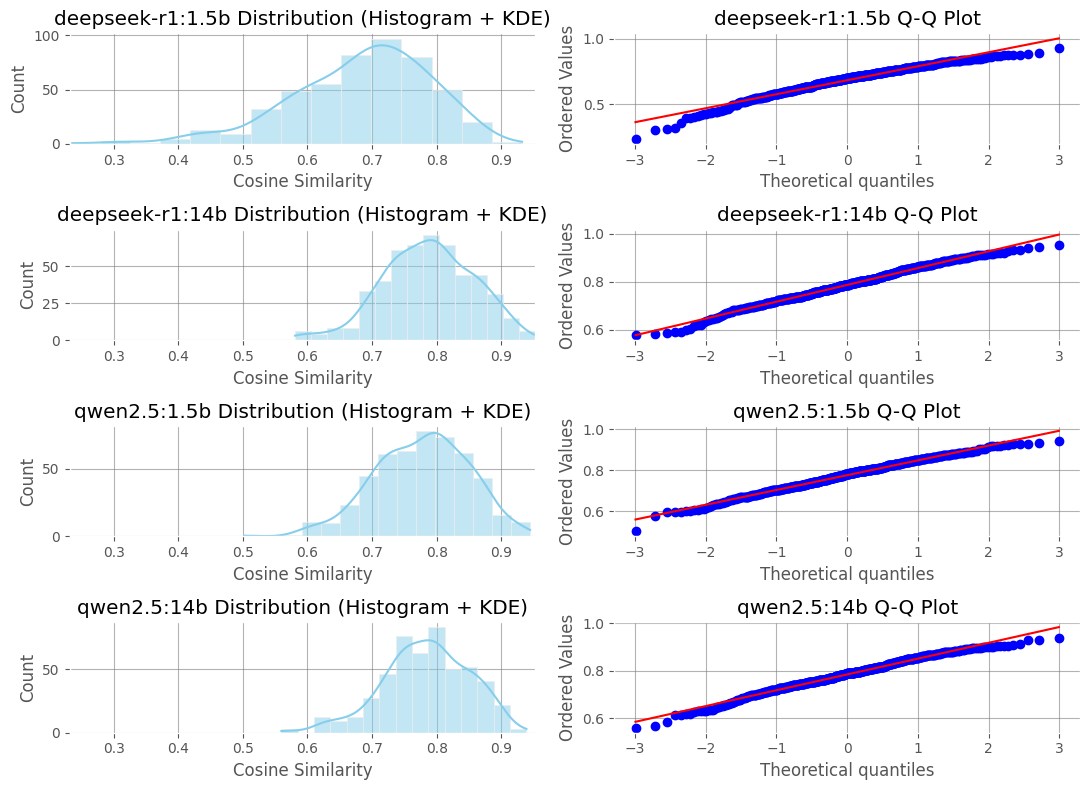

Shapiro-Wilk Normality Test Results:

deepseek-r1:1.5b: W=0.9686, p=0.0000 → Not normal
deepseek-r1:14b: W=0.9927, p=0.0152 → Not normal
qwen2.5:1.5b: W=0.9925, p=0.0133 → Not normal
qwen2.5:14b: W=0.9882, p=0.0005 → Not normal


In [92]:
#check distribution of cosine similarity values for each model in math dataset

verbal_cosune_cleaned=verbal_cosine_cleaned.rename(columns={'type': 'problem_type'}, inplace=True)

df= essay_cosine_cleaned.copy()
columns = [
    "deepseek-r1:1.5b_cosine",
    "deepseek-r1:14b_cosine",
    "qwen2.5:1.5b_cosine",
    "qwen2.5:14b_cosine"
]

all_values = pd.concat([df[col].dropna() for col in columns])
xmin, xmax = all_values.min(), all_values.max()
print (df)
plt.figure(figsize=(11, 8))
for i, col in enumerate(columns):
    plt.subplot(4, 2, i*2 + 1)
    sns.histplot(df[col], kde=True, bins=15, color='skyblue')
    plt.title(f"{col.replace('_cosine', '')} Distribution (Histogram + KDE)")
    plt.xlabel("Cosine Similarity")
    plt.xlim(xmin, xmax)
    plt.gca().set_facecolor('white')
    plt.grid(True, which='both', axis='both', linestyle='-', alpha=0.6, color='gray')

    plt.subplot(4, 2, i*2 + 2)
    probplot(df[col], dist="norm", plot=plt)
    plt.title(f"{col.replace('_cosine', '')} Q-Q Plot")
    plt.gca().set_facecolor('white')
    plt.grid(True, which='both', axis='both', linestyle='-', alpha=0.6, color='gray')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality

print("Shapiro-Wilk Normality Test Results:\n")
for col in columns:
    stat, p = shapiro(df[col].dropna())
    print(f"{col.replace('_cosine', '')}: W={stat:.4f}, p={p:.4f} → {'Not normal' if p < 0.05 else 'Probably normal'}")

Mean Cosine Similarities:
DeepSeek R1 1.5B: 0.6981
DeepSeek R1 14B: 0.7878
Qwen 2.5 1.5B: 0.7833
Qwen 2.5 14B: 0.7880


C:\Users\filip\AppData\Local\Temp\ipykernel_19100\884999696.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted, x='model_clean', y='cosine_similarity', palette=palette)


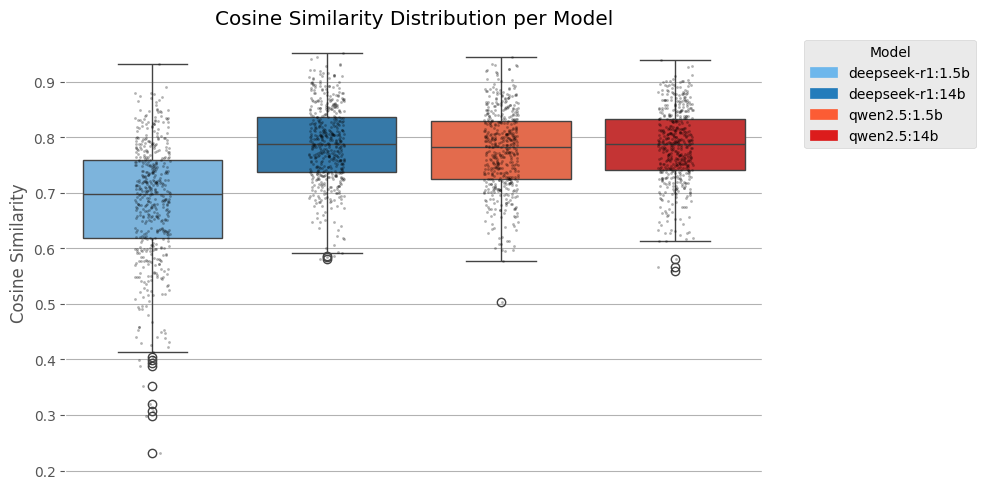

In [93]:
#plot the boxplots of cosine similarity values for each model in essay dataset
palette = {
    'deepseek-r1:1.5b': "#6db7ec",
    'deepseek-r1:14b': "#237cbb",
    'qwen2.5:1.5b': "#fc5c34",
    'qwen2.5:14b': "#dc1c1c" 
}
mean_deepseek_1_5b = df['deepseek-r1:1.5b_cosine'].median()
mean_deepseek_14b = df['deepseek-r1:14b_cosine'].median()
mean_qwen_1_5b = df['qwen2.5:1.5b_cosine'].median()
mean_qwen_14b = df['qwen2.5:14b_cosine'].median()
print(f"Mean Cosine Similarities:\n"
      f"DeepSeek R1 1.5B: {mean_deepseek_1_5b:.4f}\n"
      f"DeepSeek R1 14B: {mean_deepseek_14b:.4f}\n"
      f"Qwen 2.5 1.5B: {mean_qwen_1_5b:.4f}\n"
      f"Qwen 2.5 14B: {mean_qwen_14b:.4f}")

columns = [
    "deepseek-r1:1.5b_cosine",
    "deepseek-r1:14b_cosine",
    "qwen2.5:1.5b_cosine",
    "qwen2.5:14b_cosine"
]
melted = df.melt(value_vars=columns, var_name='model', value_name='cosine_similarity')
melted['model_clean'] = melted['model'].str.replace('_cosine', '', regex=True)

plt.figure(figsize=(10, 5))
sns.boxplot(data=melted, x='model_clean', y='cosine_similarity', palette=palette)
sns.stripplot(data=melted, x='model_clean', y='cosine_similarity', color='black', alpha=0.3, size=2, jitter=True)

plt.title("Cosine Similarity Distribution per Model")
plt.xlabel("")
plt.gca().set_xticklabels([])
plt.gca().tick_params(axis='x', which='both', bottom=False)

plt.ylabel("Cosine Similarity")
plt.grid(True, which='both', axis='y', linestyle='-', alpha=0.6, color='gray')
plt.gca().set_facecolor('white')

handles = [mpatches.Patch(color=color, label=label.replace('_cosine', '')) for label, color in palette.items()]
plt.legend(handles=handles, title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [94]:
#pairwise Wilcoxon signed-rank test essay dataset
#this test is used to compare the distributions of cosine similarity values between pairs of models for each problem type, p-value<0.05 indicates a statistically significant difference
results = []

for m1, m2 in combinations(cosine_cols, 2):
    subset = df[[m1, m2]].dropna()
    stat, p = wilcoxon(subset[m1], subset[m2])
    results.append({'model_1': m1, 'model_2': m2, 'p_value': p})

pvals = [r['p_value'] for r in results]
corrected = np.minimum(1, np.array(pvals) * len(pvals))

for i, r in enumerate(results):
    r['p_adj'] = corrected[i]

for r in results:
    signif = '***' if r['p_adj'] < 0.001 else ('**' if r['p_adj'] < 0.01 else ('*' if r['p_adj'] < 0.05 else 'ns'))
    print(f"{r['model_1']} vs {r['model_2']}: p_adj = {r['p_adj']:.4f} {signif}")

deepseek-r1:1.5b_cosine vs deepseek-r1:14b_cosine: p_adj = 0.0000 ***
deepseek-r1:1.5b_cosine vs qwen2.5:1.5b_cosine: p_adj = 0.0000 ***
deepseek-r1:1.5b_cosine vs qwen2.5:14b_cosine: p_adj = 0.0000 ***
deepseek-r1:14b_cosine vs qwen2.5:1.5b_cosine: p_adj = 0.0019 **
deepseek-r1:14b_cosine vs qwen2.5:14b_cosine: p_adj = 1.0000 ns
qwen2.5:1.5b_cosine vs qwen2.5:14b_cosine: p_adj = 0.0812 ns


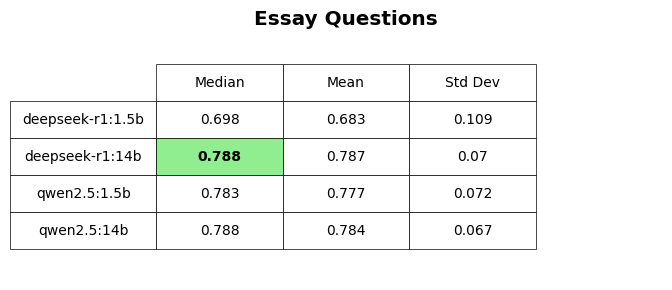

In [95]:
#plot the summary tables of cosine similarity values for each model in essay dataset
#summary tables contain median, mean, and standard deviation of cosine similarity values for each model
#this provides a concise overview of the performance of each model and how they compare to each other

overall_summary = (
    essay_cosine_cleaned[cosine_cols]
    .agg(['median', 'mean', 'std'])
    .T
    .round(3)
)
overall_summary.columns = ['Median', 'Mean', 'Std Dev']

overall_summary.index = overall_summary.index.str.replace('_cosine$', '', regex=True)

fig, ax = plt.subplots(figsize=(7, 3))
ax.axis('off')

table = ax.table(cellText=overall_summary.values,
                 colLabels=overall_summary.columns,
                 rowLabels=overall_summary.index,
                 cellLoc='center',
                 rowLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)

for key, cell in table.get_celld().items():
    cell.set_width(0.20)
    cell.set_height(0.15)

best_idx = np.argmax(overall_summary['Median'].values)
median_col_idx = list(overall_summary.columns).index('Median')

cell = table[best_idx + 1, median_col_idx]
cell.set_facecolor('lightgreen')
cell.get_text().set_weight('bold')

ax.set_title('Essay Questions', fontweight='bold')

plt.tight_layout()
plt.show()


In [96]:
# rank the models based on the times they achieved the highest cosine similariy vis-a-vis the other models, for each question in essay dataset

cosine_cols = [
    'deepseek-r1:1.5b_cosine',
    'deepseek-r1:14b_cosine',
    'qwen2.5:1.5b_cosine',
    'qwen2.5:14b_cosine'
]

df = essay_cosine_cleaned[cosine_cols]
ranked = df.rank(axis=1, method='min', ascending=False)

ranking_counts = {
    model: ranked[model].value_counts().sort_index()
    for model in cosine_cols
}
ranking_percentages = {
    model: counts / len(df) * 100
    for model, counts in ranking_counts.items()
}

places = ['1st', '2nd', '3rd', '4th']
for place in range(1, 5):
    print(f"\n{place} Place:")
    sorted_models = sorted(
        cosine_cols,
        key=lambda m: ranking_percentages[m].get(place, 0),
        reverse=True
    )
    for model in sorted_models:
        pct = ranking_percentages[model].get(place, 0)
        print(f"  - {model.replace('_cosine', '')}: {pct:.2f}%")

print("\n-- 2. How does each model place on average? --\n")
places = {1: '1st', 2: '2nd', 3: '3rd', 4: '4th'}


for model in cosine_cols:
    print(f"Model: {model.replace('_cosine', '')}")
    for place in range(1, 5):
        pct = ranking_percentages[model].get(place, 0.0)
        print(f"  - {places[place]}: {pct:.2f}%")


rank_weights = {1: 1, 2: 2, 3: 3, 4: 4}

average_ranks = {}

for model in cosine_cols:
    avg_rank = 0
    for place in range(1, 5):
        pct = ranking_percentages[model].get(place, 0)
        avg_rank += rank_weights[place] * pct
    avg_rank /= 100 
    average_ranks[model.replace('_cosine', '')] = avg_rank


print("\nAverage Ranks per Model:")
for model, avg in average_ranks.items():
    print(f"  - {model}: {avg:.3f}")




1 Place:
  - deepseek-r1:14b: 37.68%
  - qwen2.5:14b: 33.87%
  - qwen2.5:1.5b: 24.85%
  - deepseek-r1:1.5b: 3.61%

2 Place:
  - qwen2.5:1.5b: 30.86%
  - qwen2.5:14b: 30.66%
  - deepseek-r1:14b: 28.26%
  - deepseek-r1:1.5b: 10.22%

3 Place:
  - qwen2.5:1.5b: 32.67%
  - qwen2.5:14b: 27.66%
  - deepseek-r1:14b: 24.65%
  - deepseek-r1:1.5b: 15.03%

4 Place:
  - deepseek-r1:1.5b: 71.14%
  - qwen2.5:1.5b: 11.62%
  - deepseek-r1:14b: 9.42%
  - qwen2.5:14b: 7.82%

-- 2. How does each model place on average? --

Model: deepseek-r1:1.5b
  - 1st: 3.61%
  - 2nd: 10.22%
  - 3rd: 15.03%
  - 4th: 71.14%
Model: deepseek-r1:14b
  - 1st: 37.68%
  - 2nd: 28.26%
  - 3rd: 24.65%
  - 4th: 9.42%
Model: qwen2.5:1.5b
  - 1st: 24.85%
  - 2nd: 30.86%
  - 3rd: 32.67%
  - 4th: 11.62%
Model: qwen2.5:14b
  - 1st: 33.87%
  - 2nd: 30.66%
  - 3rd: 27.66%
  - 4th: 7.82%

Average Ranks per Model:
  - deepseek-r1:1.5b: 3.537
  - deepseek-r1:14b: 2.058
  - qwen2.5:1.5b: 2.311
  - qwen2.5:14b: 2.094


## **Syntactic Table**

In [97]:
syntactic_cosine=pd.read_csv('cosine_datasets/mean_median.csv')
syntactic_cosine

,Model,Mean,Median,Std,Category
0,DeepSeek R1 1.5B,0.331343,0.333656,0.111548,Essay
1,DeepSeek R1 14B,0.388703,0.394972,0.103016,Essay
2,Qwen2.5 1.5B,0.423286,0.431762,0.106928,Essay
3,Qwen2.5 14B,0.453259,0.459645,0.098620,Essay
4,DeepSeek R1 1.5B,0.342623,0.344229,0.213919,Math
5,DeepSeek R1 14B,0.386258,0.404378,0.214303,Math
6,Qwen2.5 1.5B,0.416149,0.425770,0.191579,Math
7,Qwen2.5 14B,0.425241,0.442808,0.193833,Math
8,DeepSeek R1 1.5B,0.149060,0.098698,0.150574,Proofs
9,DeepSeek R1 14B,0.264702,0.244871,0.184420,Proofs


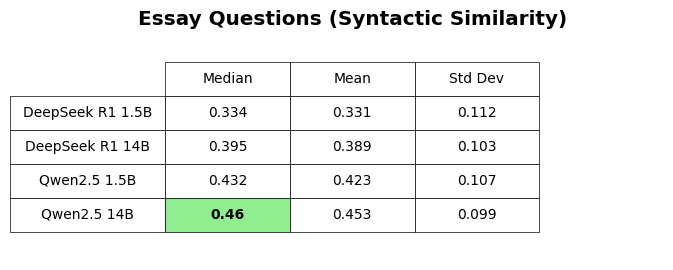

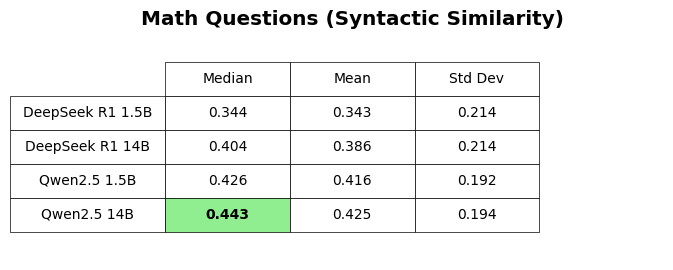

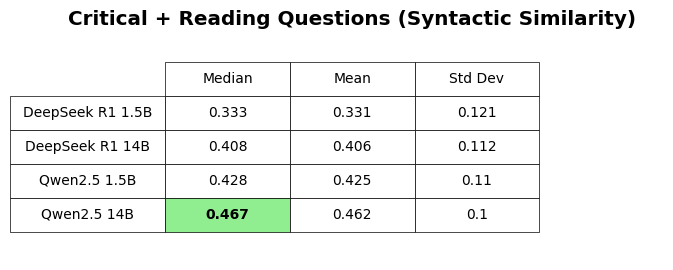

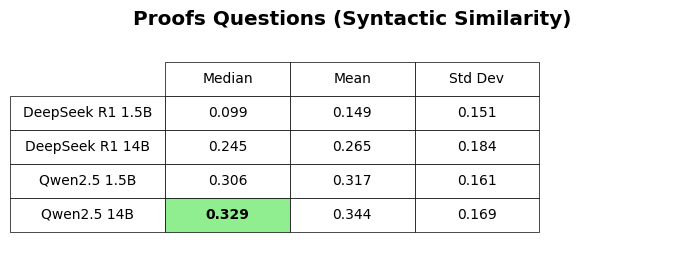

In [98]:
def plot_summary_table(df, category):
    subset = df[df['Category'] == category].copy()
    subset = subset[['Model', 'Median', 'Mean', 'Std']].set_index('Model')
    subset.columns = ['Median', 'Mean', 'Std Dev']
    subset = subset.round(3)

    fig, ax = plt.subplots(figsize=(7, 2.8))
    ax.axis('off')

    table = ax.table(cellText=subset.values,
                     colLabels=subset.columns,
                     rowLabels=subset.index,
                     cellLoc='center',
                     rowLoc='center',
                     loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(10)

    for key, cell in table.get_celld().items():
        cell.set_width(0.2)
        cell.set_height(0.15)

    best_idx = np.argmax(subset['Median'].values)
    median_col_idx = list(subset.columns).index('Median')
    cell = table[best_idx + 1, median_col_idx]  # +1 to skip header row
    cell.set_facecolor('lightgreen')
    cell.get_text().set_weight('bold')

    ax.set_title(f'{category} Questions (Syntactic Similarity)', fontweight='bold')
    plt.tight_layout()
    plt.show()

plot_summary_table(syntactic_cosine, 'Essay')
plot_summary_table(syntactic_cosine, 'Math')
plot_summary_table(syntactic_cosine, 'Critical + Reading')  # Verbal
plot_summary_table(syntactic_cosine, 'Proofs')

In [100]:
#read json file
import json
with open('jsons_llm_as_a_judge/math_ranking_analysis.json', 'r') as f:
    math_ranking_json = json.load(f)
with open('jsons_llm_as_a_judge/verbal_ranking_analysis.json', 'r') as f:
    verbal_ranking_json = json.load(f)
with open('jsons_llm_as_a_judge/proof_ranking_analysis.json', 'r') as f:
    proofs_ranking_json = json.load(f)
with open('jsons_llm_as_a_judge/ielts_ranking_analysis.json', 'r') as f:
    essay_ranking_json = json.load(f)


verbal_ranking_json


{'total_processed_rows': 468,
 'position_distribution_percentage': {'1st': {'qwen2.5:14b': 63.67521367521367,
   'deepseek-r1:14b': 26.495726495726498,
   'qwen2.5:1.5b': 5.3418803418803416,
   'deepseek-r1:1.5b': 4.487179487179487},
  '2nd': {'deepseek-r1:14b': 50.85470085470085,
   'qwen2.5:14b': 25.427350427350426,
   'qwen2.5:1.5b': 15.17094017094017,
   'deepseek-r1:1.5b': 8.547008547008547},
  '3rd': {'qwen2.5:1.5b': 44.230769230769226,
   'deepseek-r1:1.5b': 33.11965811965812,
   'deepseek-r1:14b': 14.957264957264957,
   'qwen2.5:14b': 7.6923076923076925},
  '4th': {'deepseek-r1:1.5b': 53.84615384615385,
   'qwen2.5:1.5b': 35.256410256410255,
   'deepseek-r1:14b': 7.6923076923076925,
   'qwen2.5:14b': 3.205128205128205}},
 'model_performance_percentage': {'deepseek-r1:1.5b': {'1st': 4.487179487179487,
   '2nd': 8.547008547008547,
   '3rd': 33.11965811965812,
   '4th': 53.84615384615385},
  'deepseek-r1:14b': {'1st': 26.495726495726498,
   '2nd': 50.85470085470085,
   '3rd': 14.9

In [ ]:
def compute_summary(position_dist, model_order):
    ranks = ['1st', '2nd', '3rd', '4th']
    rank_scores = [1, 2, 3, 4]

    # Create DataFrame: rows = models, columns = rank positions
    data = {model: [position_dist[rank].get(model, 0) for rank in ranks] for model in model_order}
    df = pd.DataFrame(data, index=ranks).T

    # Compute statistics
    df['Average Rank'] = df.apply(lambda row: round(np.average(rank_scores, weights=row), 3), axis=1)

    return df[['Average Rank']]

# Desired order
model_order = [
    'qwen2.5:14b',
    'qwen2.5:1.5b',
    'deepseek-r1:14b',
    'deepseek-r1:1.5b'
]

# Compute summaries

proofs_summary = compute_summary(proofs_ranking_json["position_distribution_percentage"], model_order)
math_summary = compute_summary(math_ranking_json["position_distribution_percentage"], model_order)
essay_summary = compute_summary(essay_ranking_json["position_distribution_percentage"], model_order)
verbal_summary = compute_summary(verbal_ranking_json["position_distribution_percentage"], model_order)

# Display

print("\nProofs:\n", proofs_summary)
print("Math:\n", math_summary)
print("\nEssay:\n", essay_summary)
print("\nVerbal:\n", verbal_summary)



Proofs:
                   Average Rank
qwen2.5:14b              1.659
qwen2.5:1.5b             2.927
deepseek-r1:14b          1.952
deepseek-r1:1.5b         3.462
Math:
                   Average Rank
qwen2.5:14b              1.843
qwen2.5:1.5b             3.176
deepseek-r1:14b          2.025
deepseek-r1:1.5b         2.956

Essay:
                   Average Rank
qwen2.5:14b              2.726
qwen2.5:1.5b             2.203
deepseek-r1:14b          2.203
deepseek-r1:1.5b         2.869

Verbal:
                   Average Rank
qwen2.5:14b              1.504
qwen2.5:1.5b             3.094
deepseek-r1:14b          2.038
deepseek-r1:1.5b         3.363


In [ ]:
datasets = {
    'math': math_cosine_cleaned,
    'proofs': proofs_cosine_cleaned,
    'essay': essay_cosine_cleaned,
    'verbal': verbal_cosine_cleaned
}

cosine_cols = [
    'qwen2.5:14b_cosine',
    'qwen2.5:1.5b_cosine',
    'deepseek-r1:14b_cosine',
    'deepseek-r1:1.5b_cosine',
]

all_avg_ranks = {}

for name, df_full in datasets.items():
    df = df_full[cosine_cols]
    ranked = df.rank(axis=1, method='min', ascending=False)
    
    ranking_counts = {
        model: ranked[model].value_counts().sort_index()
        for model in cosine_cols
    }
    ranking_percentages = {
        model: counts / len(df) * 100
        for model, counts in ranking_counts.items()
    }
    
    rank_weights = {1: 1, 2: 2, 3: 3, 4: 4}
    average_ranks = {}
    for model in cosine_cols:
        avg_rank = 0
        for place in range(1, 5):
            pct = ranking_percentages[model].get(place, 0)
            avg_rank += rank_weights[place] * pct
        avg_rank /= 100
        average_ranks[model.replace('_cosine', '')] = avg_rank
    
    all_avg_ranks[name] = average_ranks

# Print all results
for dataset_name, avg_ranks in all_avg_ranks.items():
    print(f"\nAverage ranks for {dataset_name}:")
    for model, avg in avg_ranks.items():
        print(f"  - {model}: {avg:.3f}")


Average ranks for math:
  - qwen2.5:14b: 2.097
  - qwen2.5:1.5b: 2.232
  - deepseek-r1:14b: 2.734
  - deepseek-r1:1.5b: 2.929

Average ranks for proofs:
  - qwen2.5:14b: 1.669
  - qwen2.5:1.5b: 2.124
  - deepseek-r1:14b: 2.918
  - deepseek-r1:1.5b: 3.289

Average ranks for essay:
  - qwen2.5:14b: 2.094
  - qwen2.5:1.5b: 2.311
  - deepseek-r1:14b: 2.058
  - deepseek-r1:1.5b: 3.537

Average ranks for verbal:
  - qwen2.5:14b: 1.910
  - qwen2.5:1.5b: 2.394
  - deepseek-r1:14b: 2.448
  - deepseek-r1:1.5b: 3.227


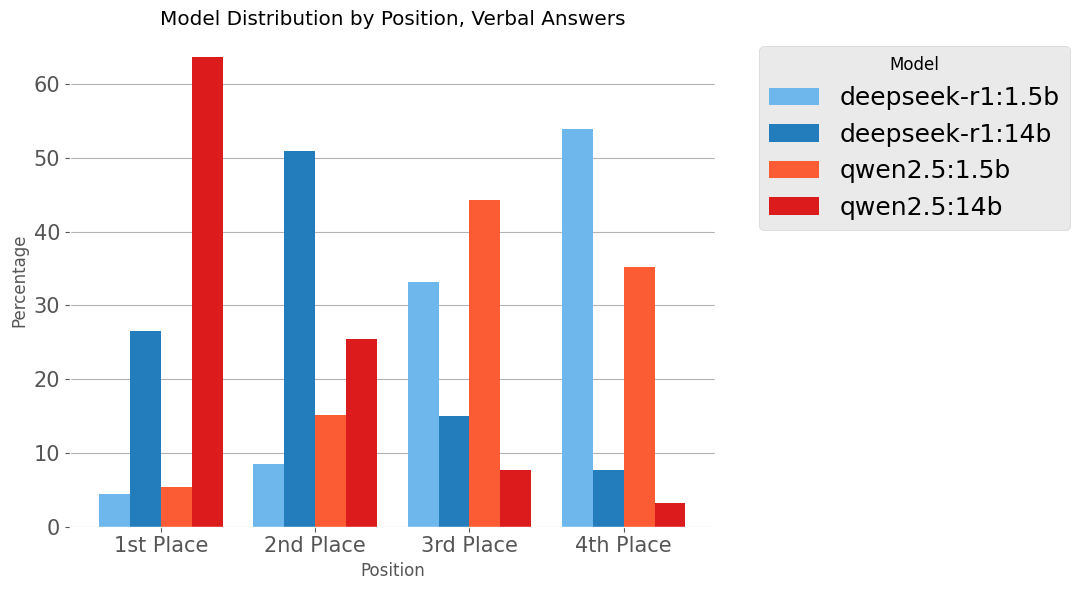

In [119]:
import matplotlib.pyplot as plt

verbal_ranking_json = {'total_processed_rows': 468,
 'position_distribution_percentage': {'1st': {'qwen2.5:14b': 63.67521367521367,
   'deepseek-r1:14b': 26.495726495726498,
   'qwen2.5:1.5b': 5.3418803418803416,
   'deepseek-r1:1.5b': 4.487179487179487},
  '2nd': {'deepseek-r1:14b': 50.85470085470085,
   'qwen2.5:14b': 25.427350427350426,
   'qwen2.5:1.5b': 15.17094017094017,
   'deepseek-r1:1.5b': 8.547008547008547},
  '3rd': {'qwen2.5:1.5b': 44.230769230769226,
   'deepseek-r1:1.5b': 33.11965811965812,
   'deepseek-r1:14b': 14.957264957264957,
   'qwen2.5:14b': 7.6923076923076925},
  '4th': {'deepseek-r1:1.5b': 53.84615384615385,
   'qwen2.5:1.5b': 35.256410256410255,
   'deepseek-r1:14b': 7.6923076923076925,
   'qwen2.5:14b': 3.205128205128205}},
}
# Setup
positions = ['1st', '2nd', '3rd', '4th']
models = ['deepseek-r1:1.5b', 'deepseek-r1:14b', 'qwen2.5:1.5b', 'qwen2.5:14b']
palette = {
    'deepseek-r1:1.5b': "#6db7ec",
    'deepseek-r1:14b': "#237cbb",
    'qwen2.5:1.5b': "#fc5c34",
    'qwen2.5:14b': "#dc1c1c" 
}

# Extract data
data = {model: [] for model in models}
for pos in positions:
    dist = verbal_ranking_json["position_distribution_percentage"][pos]
    for model in models:
        data[model].append(dist.get(model, 0))

# Plot
bar_width = 0.2
x = range(len(positions))
plt.figure(figsize=(11, 6))

for i, model in enumerate(models):
    plt.bar(
        [pos + i * bar_width for pos in x],
        data[model],
        width=bar_width,
        color=palette[model],
        label=model
    )

plt.xlabel("Position")
plt.ylabel("Percentage")
plt.title("Model Distribution by Position, Verbal Answers")

plt.xticks([pos + 1.5 * bar_width for pos in x], [p + " Place" for p in positions], fontsize=15)
plt.yticks(fontsize=15)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1),  fontsize=18, title_fontsize=12, loc='upper left')
plt.grid(True, which='both', axis='y', linestyle='-', alpha=0.6, color='gray')
plt.gca().set_facecolor('white')
plt.tight_layout()
plt.show()
